In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy.random import multinomial

def bootstrap(series, n: int=1000):
    samples = multinomial(series.sum(), series/series.sum(), n)
    return samples / series.sum()

In [3]:
import math

def cohens_d(d1, d2):
    
    n1 = len(d1)
    n2 = len(d2)

    s1 = (
        ((d1-d1.mean())**2).sum() /
        (n1-1)
    )

    s2 = (
        ((d2-d2.mean())**2).sum() /
        (n2-1)
    )

    s = math.sqrt(
        ((n1-1)*s1 + (n2-1)*s2) /
        (n1+n2-2)
    )

    return (d1.mean() - d2.mean()) / s

In [56]:
import numpy as np

from lint.models import Token

def score_movement(s1, s2):
    
    b1 = bootstrap(s1)
    b2 = bootstrap(s2)
    
    ds = []
    for c1, c2 in zip(b1.T, b2.T):
        
        c1_high = c1.mean() + c1.std()*2
        c1_low = c1.mean() - c1.std()*2
        c2_high = c2.mean() + c2.std()*2
        c2_low = c2.mean() - c2.std()*2
        
        if c1_low > c2_high:
            ds.append(c1_low - c2_high)
            
        elif c2_low > c1_high:
            ds.append(c2_low - c1_high)
        
    return sum(ds)

In [57]:
from joblib import Memory

from lint.models import Token

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(10000)

In [58]:
year1a = 1840
year1b = 1860
year2a = 1980
year2b = 2000

min_count = 10000

data = []
for token, count in list(tokens.items())[:1000]:
    
    s1 = Token.token_series(token, year1=year1a, year2=year1b)
    s2 = Token.token_series(token, year1=year2a, year2=year2b)
    
    if s1.sum() > min_count and s2.sum() > min_count:
        data.append((token, count, score_movement(s1, s2)))

In [59]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'count', 'cohensd'))

df.sort_values('cohensd', ascending=False, inplace=True)

In [60]:
pd.set_option('display.max_rows', 1000)

df.head(100)

token     count   cohensd
873  marriage    201436  0.061428
610   married    315619  0.052878
636    months    296384  0.041189
794      kill    225454  0.040700
92       dont   2492013  0.040634
424   chapter    456329  0.032789
364      fire    530985  0.030174
445    letter    433570  0.029417
468   husband    420956  0.029178
265      cant    755295  0.027800
843     court    207954  0.026874
5           i  32831159  0.026111
329   friends    596893  0.026065
251     since    835831  0.026044
392      wont    486902  0.025522
206     years   1177206  0.025460
283       end    718363  0.024059
404     often    476597  0.023320
159      want   1453341  0.023118
899      bill    193612  0.022990
98      think   2403940  0.022261
646      jack    292303  0.022075
272      wife    732534  0.022037
580        dr    339540  0.022037
15        had  17170770  0.021955
595        ye    328397  0.021092
446      year    432805  0.020816
111       get   2176510  0.020342
192     didnt   1262355  0.020238
11        you  21824060  0.020105
763   kitchen    236629  0.020093
861    public    203663  0.019799
857     chief    204697  0.019665
731   colonel    251260  0.019661
772    george    233887  0.019429
632     lived    299694  0.019137
48              5554106  0.018622
201      miss   1192368  0.018446
475         t    417755  0.018370
649       tom    287176  0.018216
765    killed    235974  0.017925
252        de    807246  0.017906
395     happy    482401  0.017860
182    father   1335731  0.017765
710      shot    259131  0.017731
45         we   5821005  0.017452
146     going   1636710  0.016895
441   wouldnt    436362  0.016281
60       will   4394763  0.016197
26       said   9383886  0.016079
69        its   3539001  0.015842
691     weeks    265423  0.015818
852    stairs    205685  0.015800
666      york    279837  0.015535
906   letters    192252  0.015530
590     paper    331307  0.015495
126       day   1881713  0.015316
858      hill    204226  0.015011
579     uncle    339563  0.014972
239      name    884799  0.014958
714      pain    255951  0.014853
791     marry    226532  0.014848
459       ago    428280  0.014461
62      about   4246198  0.014373
396   couldnt    482333  0.014290
50      which   5250411  0.014246
320       hes    617373  0.014224
158       saw   1460994  0.014171
303     water    664620  0.014110
421   captain    459338  0.014032
614      wind    312772  0.014024
704      pale    261051  0.013966
285     youre    710577  0.013924
455    during    429436  0.013681
417    doctor    464328  0.013613
245     thats    870930  0.013336
537      stop    366455  0.013296
489      fine    409093  0.013225
823     write    213719  0.013115
644    figure    292801  0.013066
347     front    558691  0.012854
718       law    254310  0.012843
74       down   3228577  0.012764
209       n't   1146440  0.012741
817       dog    215446  0.012707
792       joy    226065  0.012483
652     trees    286187  0.012416
282      feet    720587  0.012052
148        im   1585274  0.011983
917         j    187993  0.011760
749      boat    244038  0.011666
321      whom    617194  0.011547
264       sir    756436  0.011455
187     woman   1295708  0.011451
505     blood    394843  0.011424
351      city    553171  0.011416
811  american    219162  0.011317
849     hotel    206055  0.011236
502     mouth    397652  0.011235
713      news    256532  0.011156

In [63]:
def plot_movement(
    token: str,
    year1a: int=1840,
    year1b: int=1860,
    year2a: int=1980,
    year2b: int=2000,
):
    
    s1 = Token.token_series(token, year1=year1a, year2=year1b)
    s2 = Token.token_series(token, year1=year2a, year2=year2b)
    
    b1 = bootstrap(s1)
    b2 = bootstrap(s2)
    
    plt.figure(figsize=(10,10))
    plt.ylim([0, 0.02])

    plt.plot(b1.mean(0))

    plt.fill_between(
        range(100),
        b1.mean(0) + 2*b1.std(0),
        b1.mean(0) - 2*b1.std(0),
        color='black',
        alpha=0.1,
    )

    plt.plot(b2.mean(0))

    plt.fill_between(
        range(100),
        b2.mean(0) + 2*b2.std(0),
        b2.mean(0) - 2*b2.std(0),
        color='black',
        alpha=0.1,
    )

    print(token)
    plt.show()

marriage


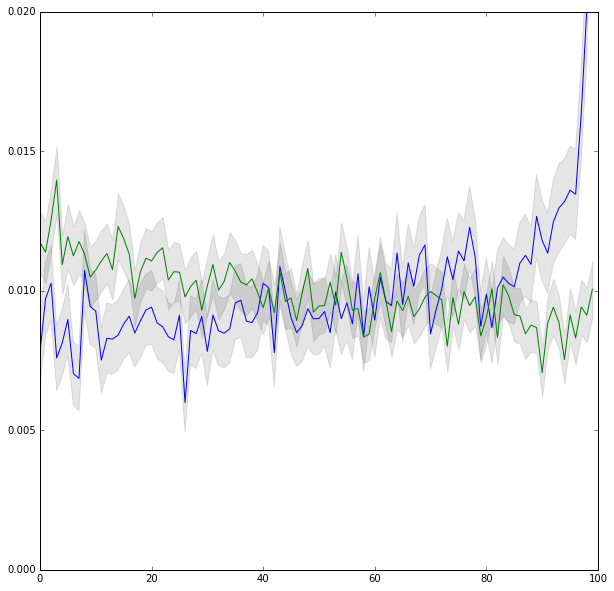

married


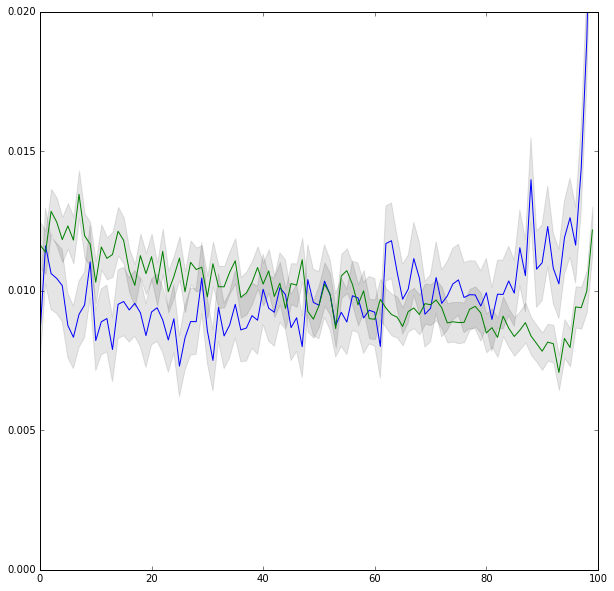

months


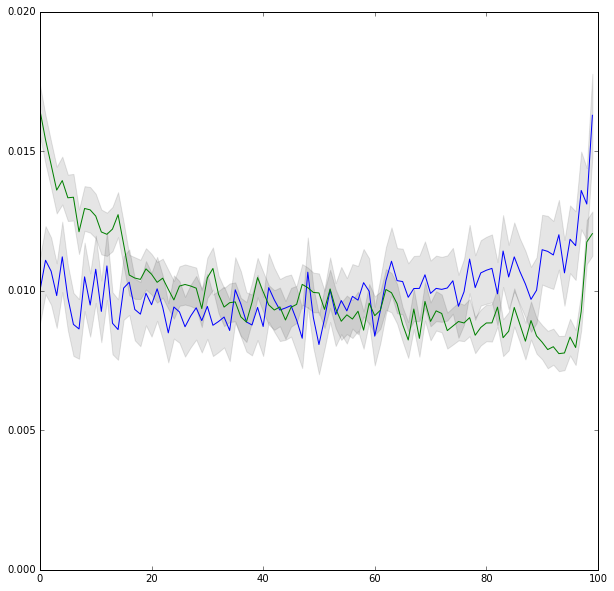

kill


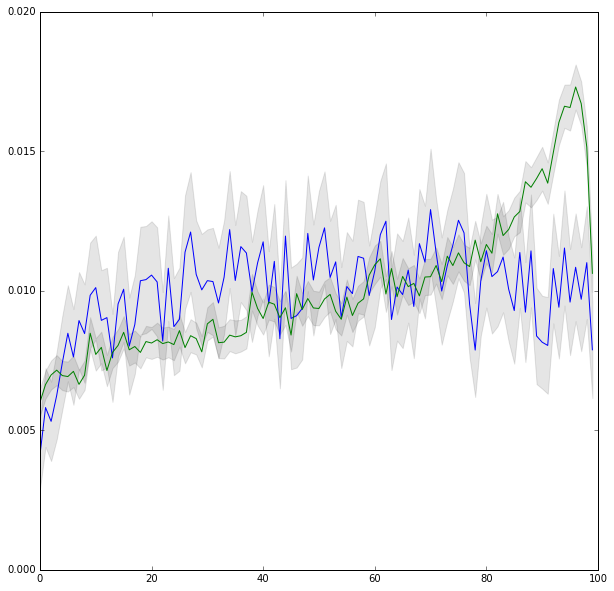

dont


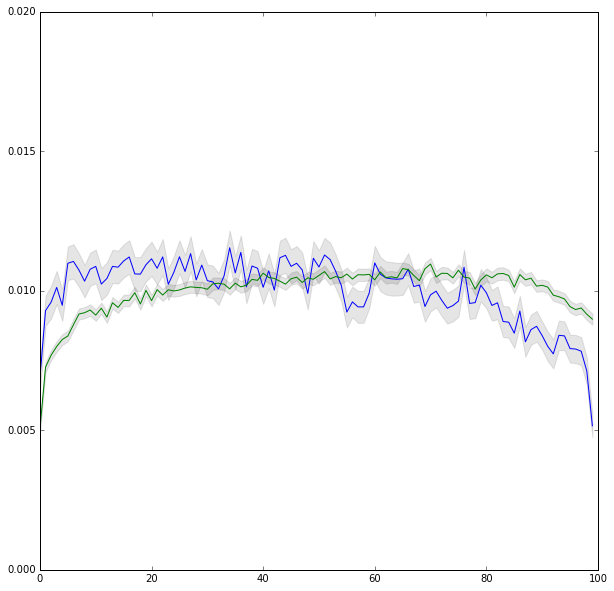

chapter


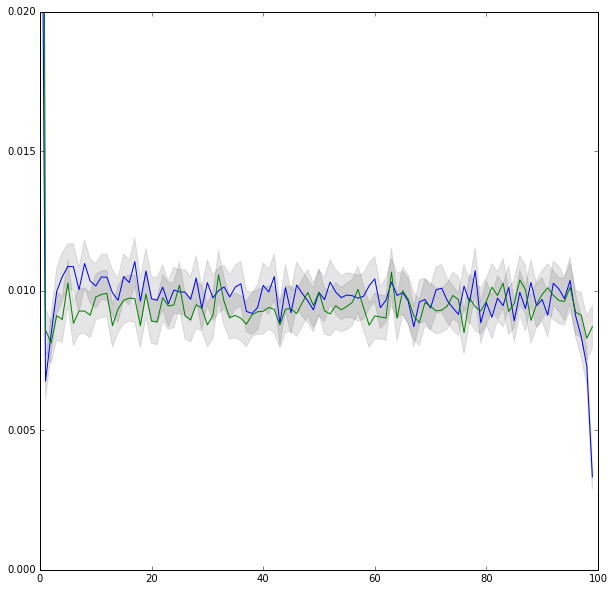

fire


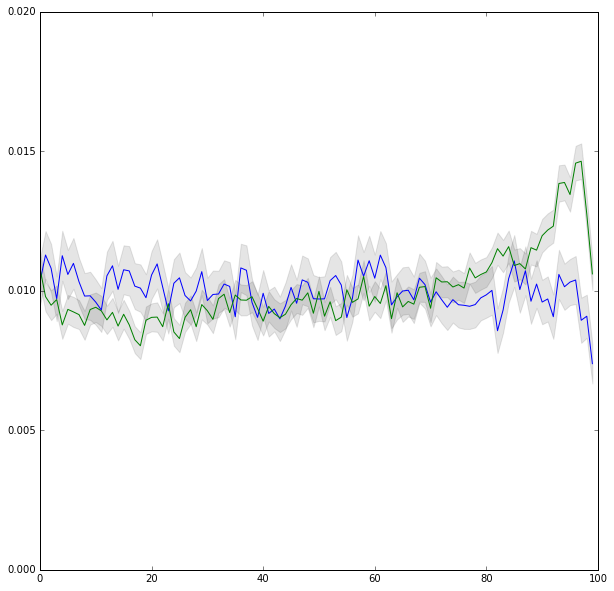

letter


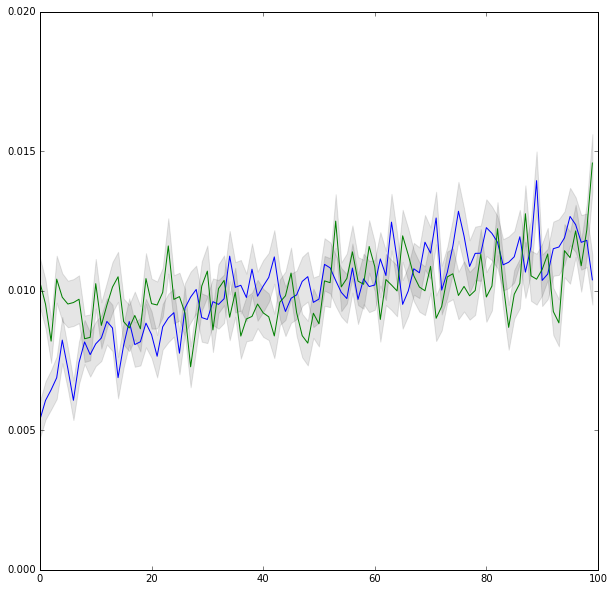

husband


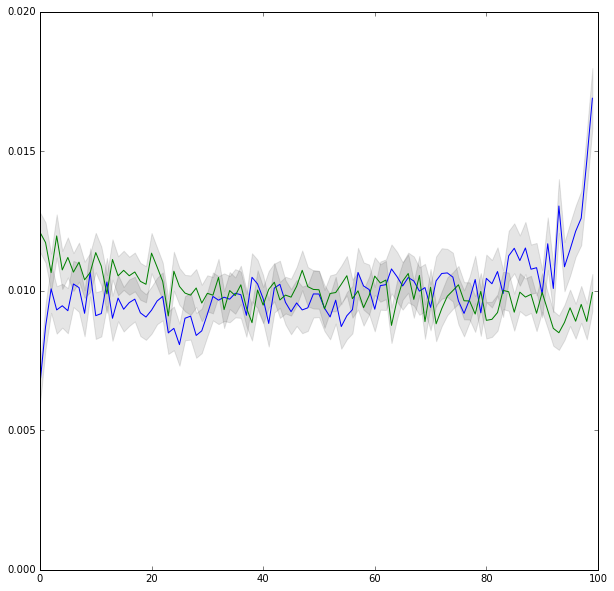

cant


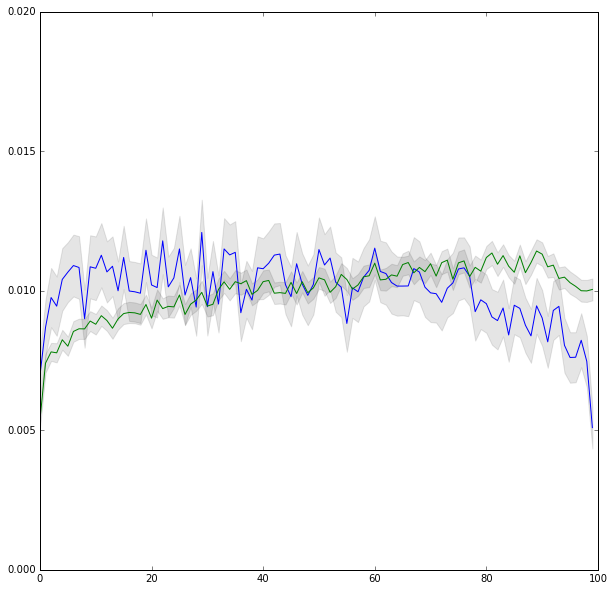

court


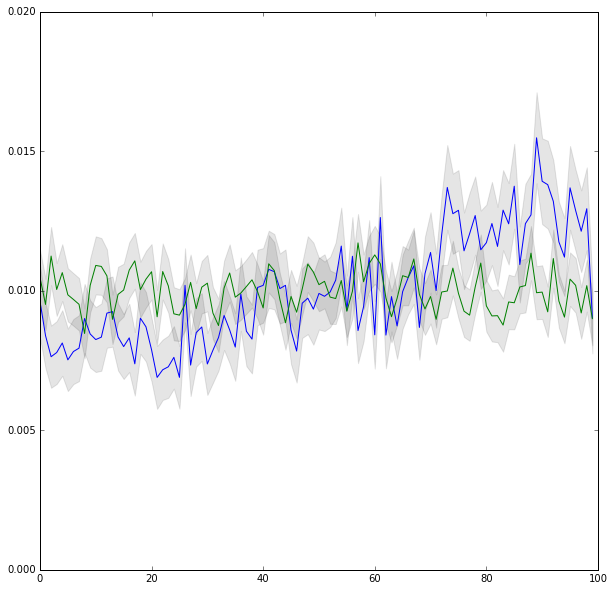

i


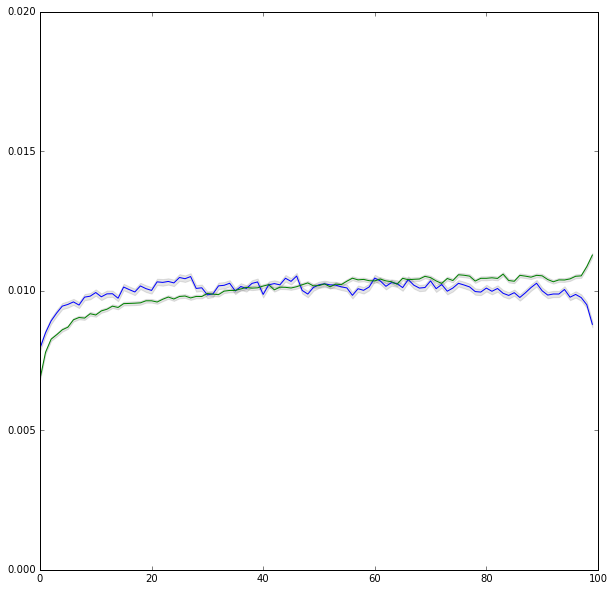

friends


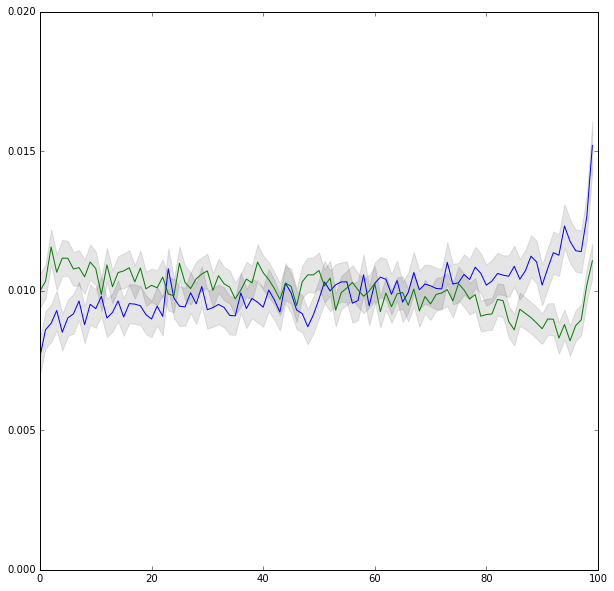

since


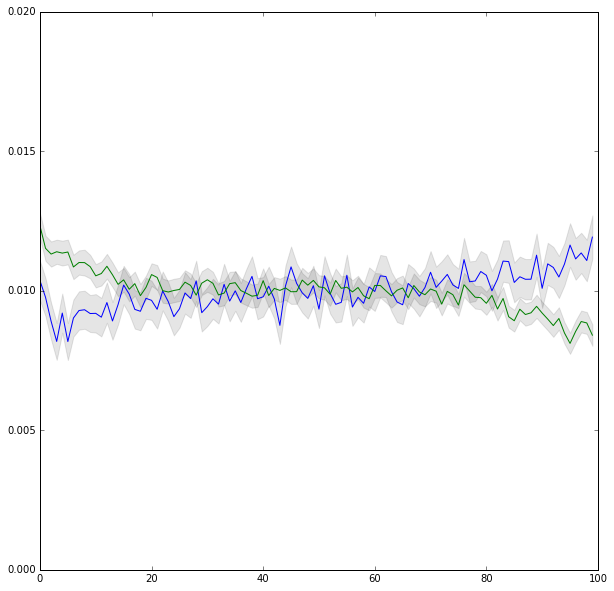

wont


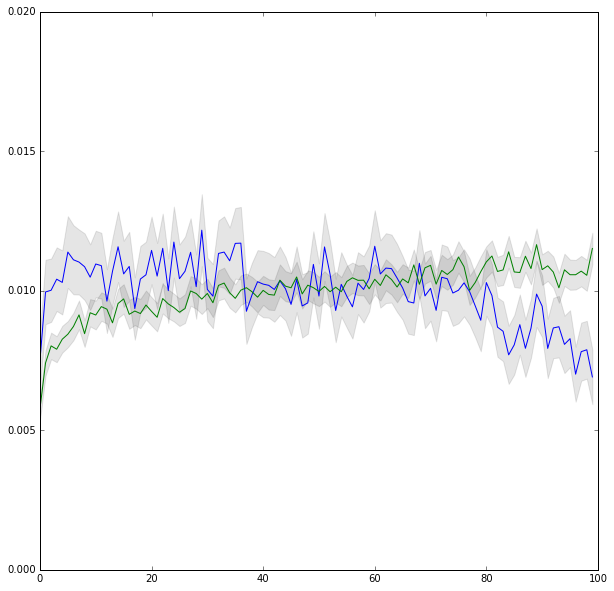

years


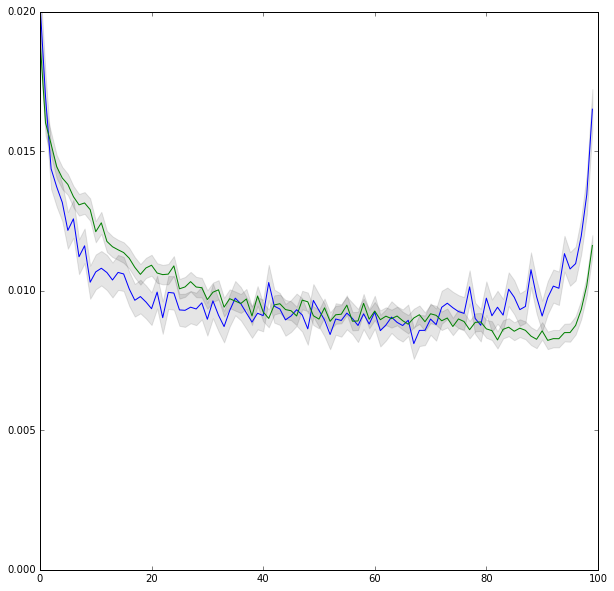

end


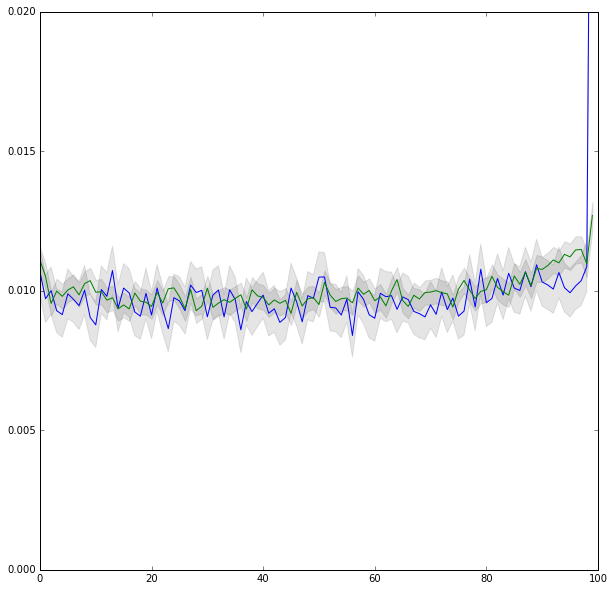

often


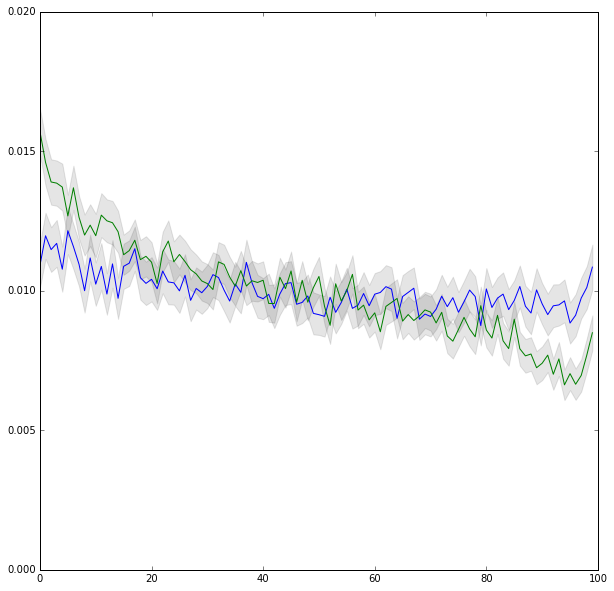

want


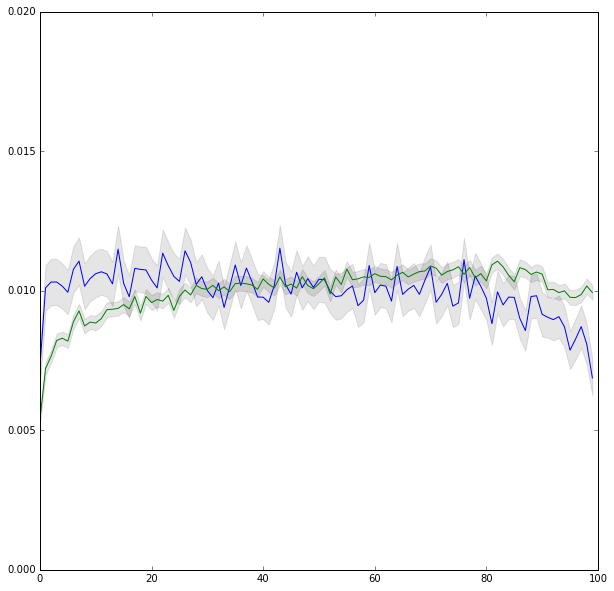

bill


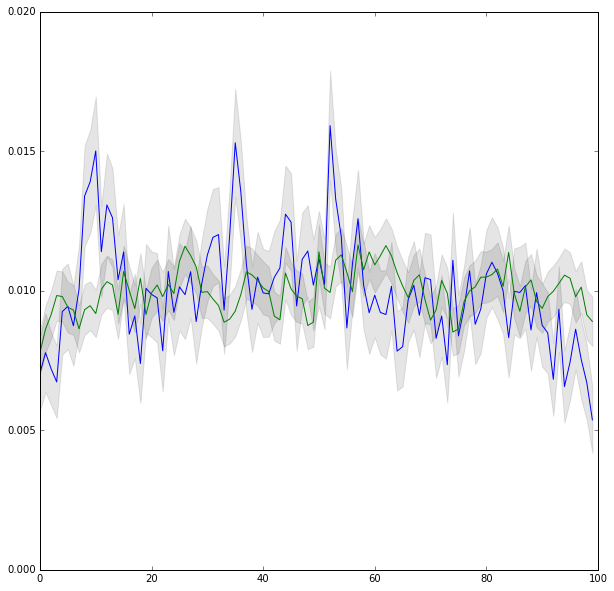

think


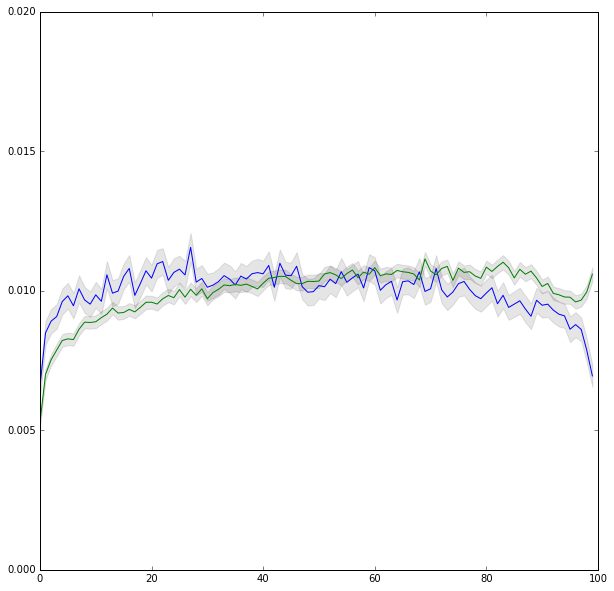

jack


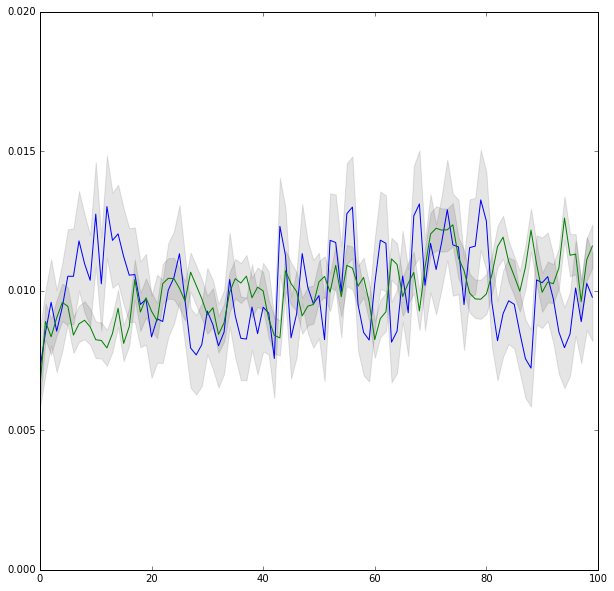

wife


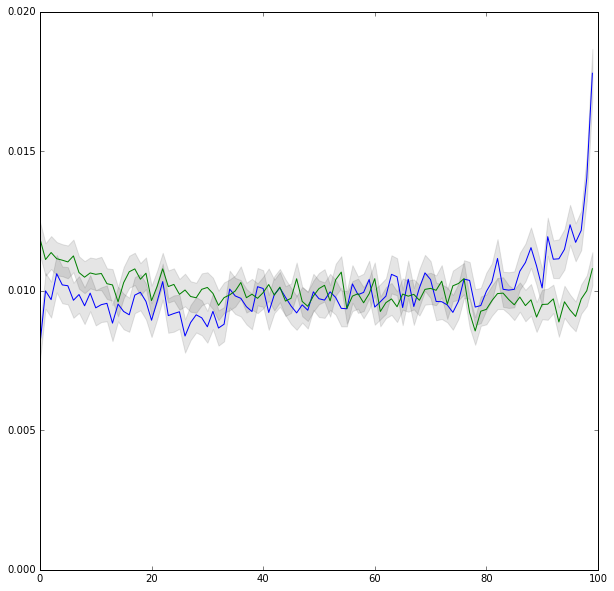

dr


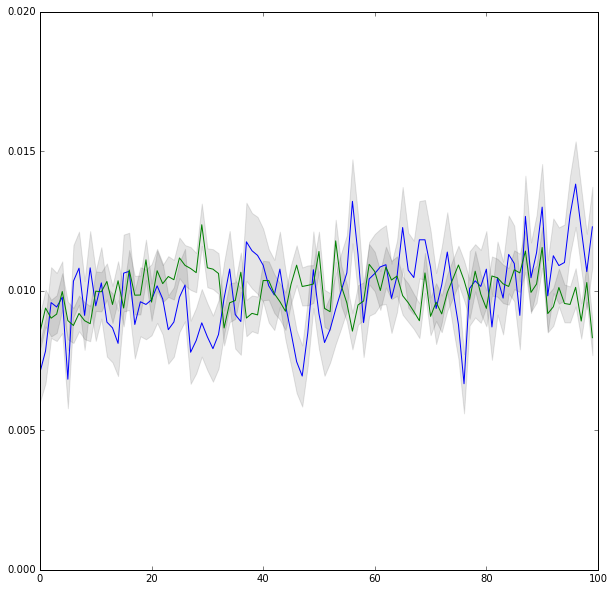

had


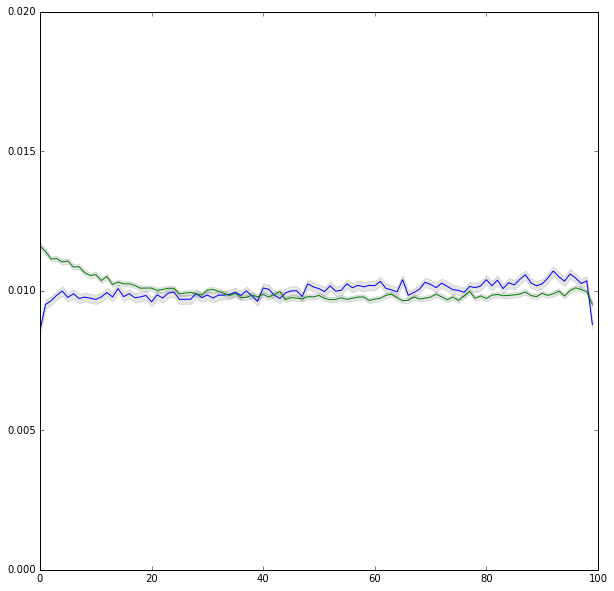

ye


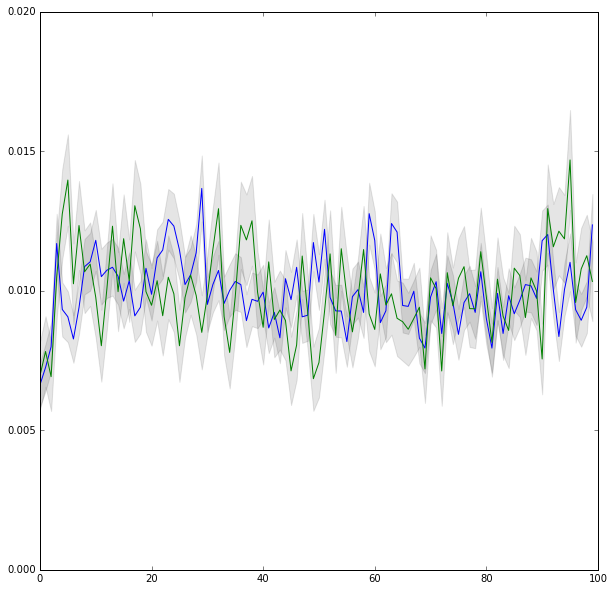

year


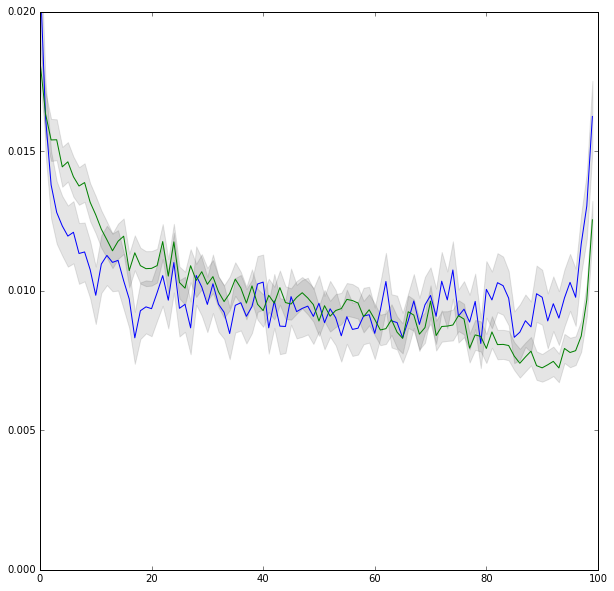

get


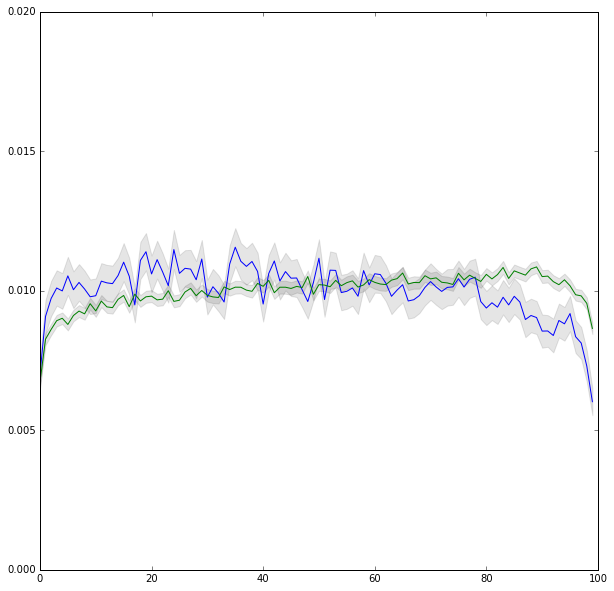

didnt


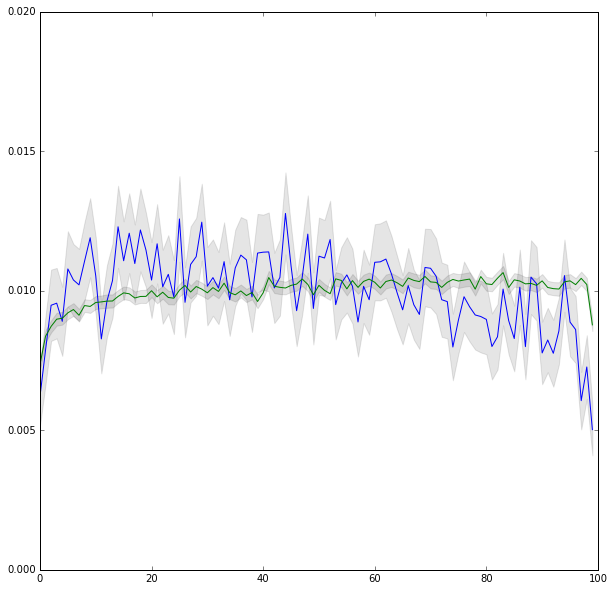

you


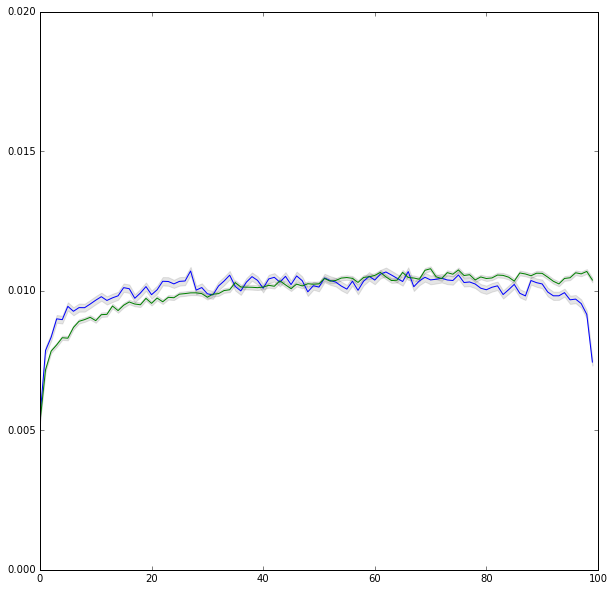

kitchen


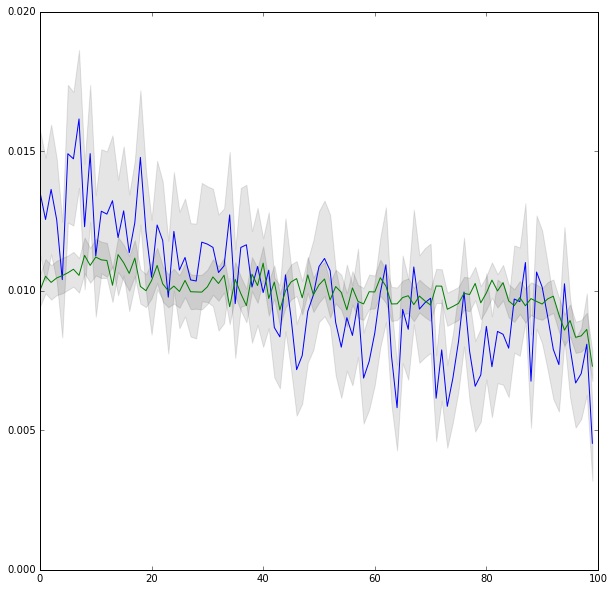

public


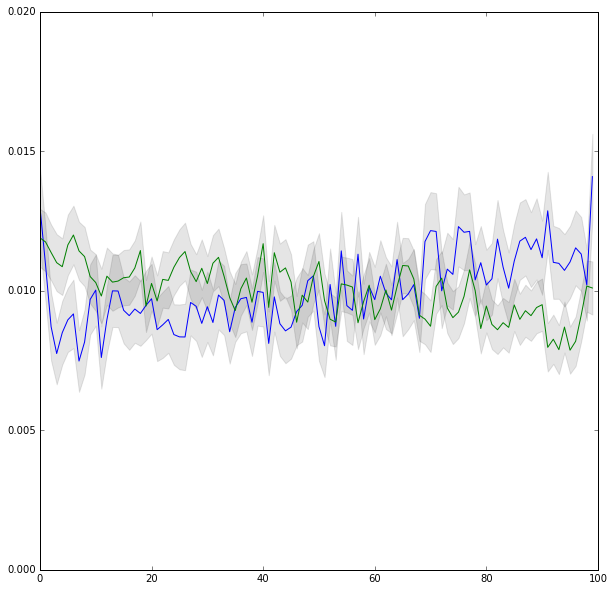

chief


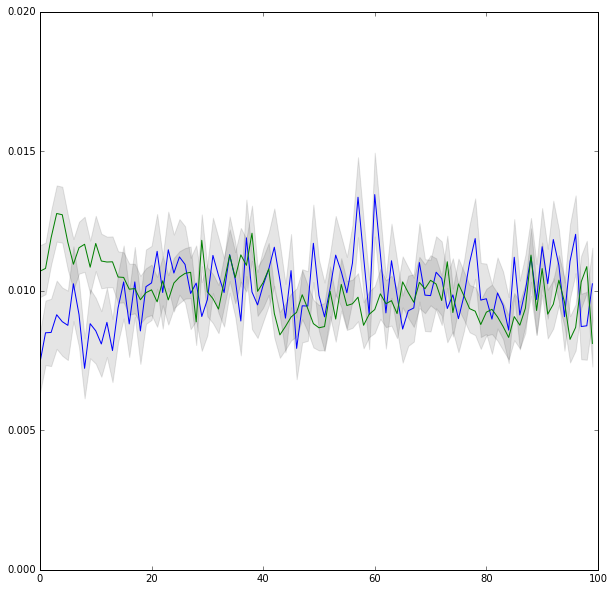

colonel


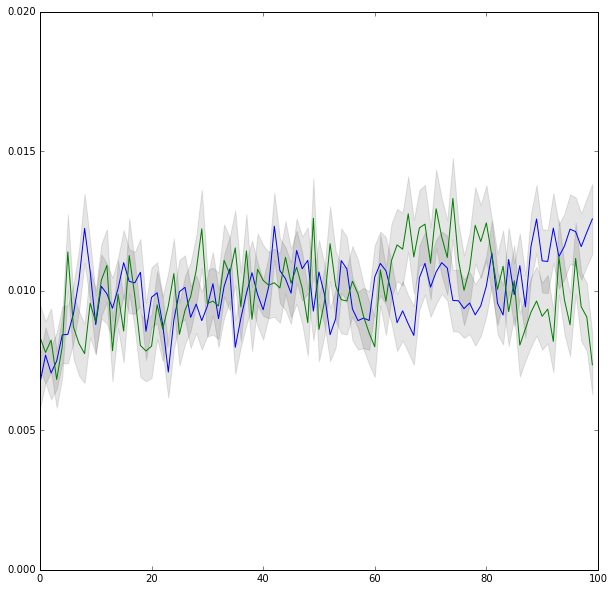

george


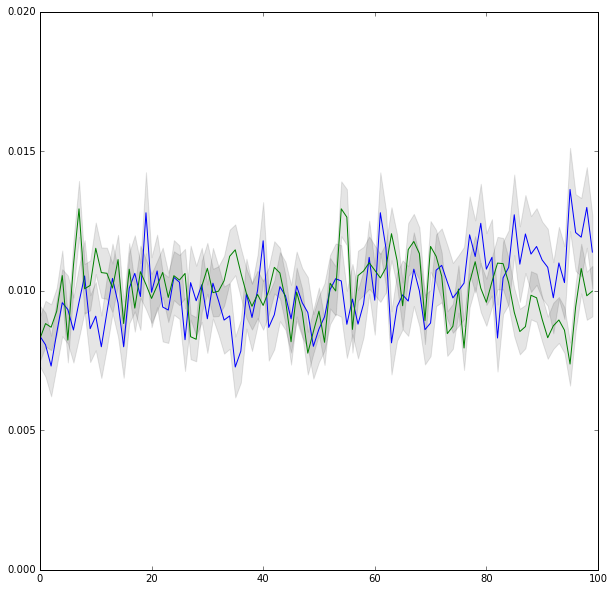

lived


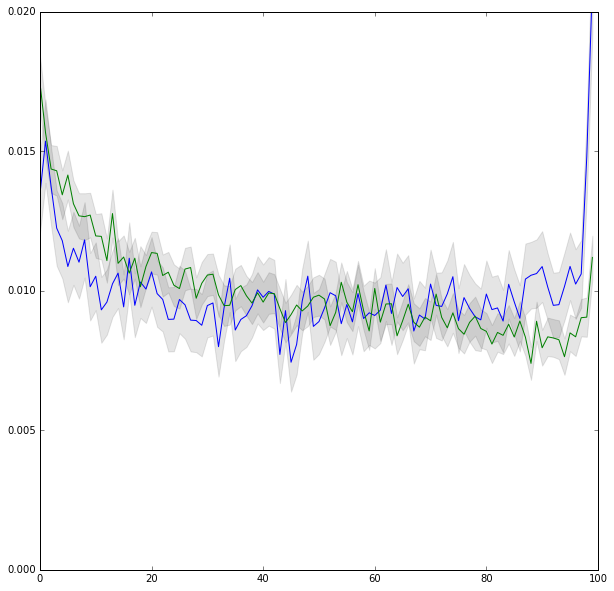

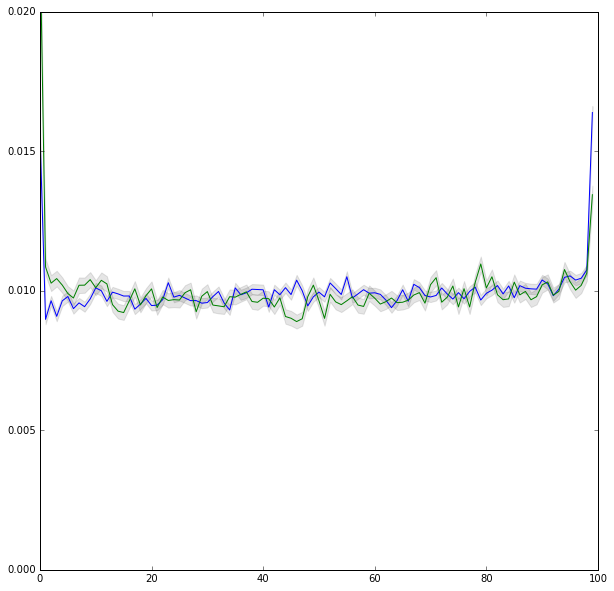

miss


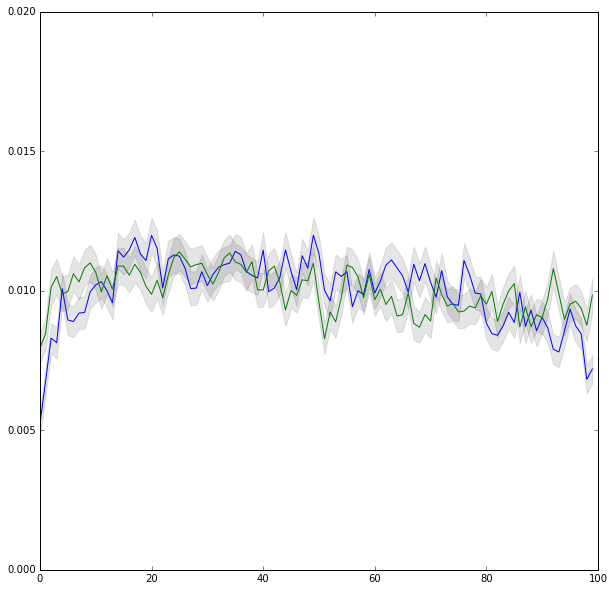

t


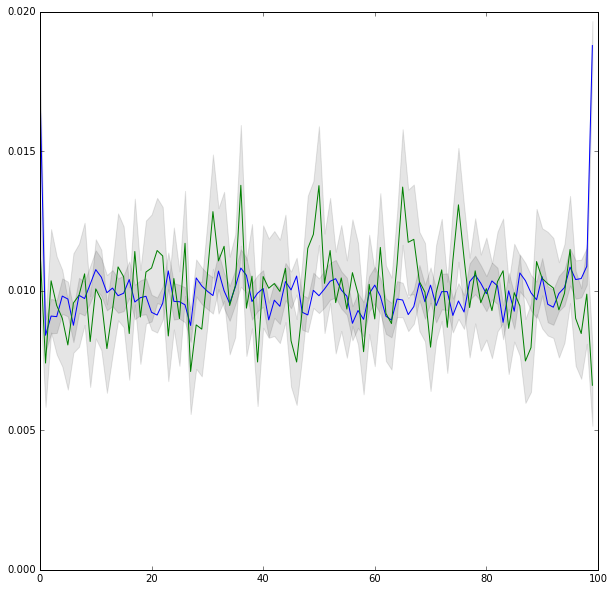

tom


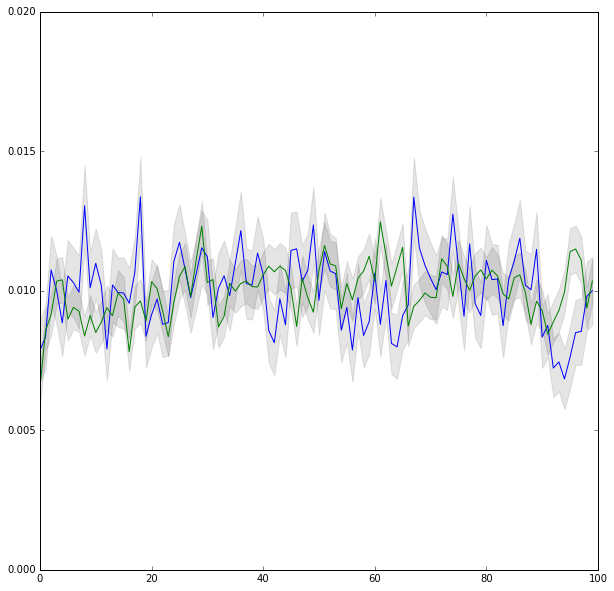

killed


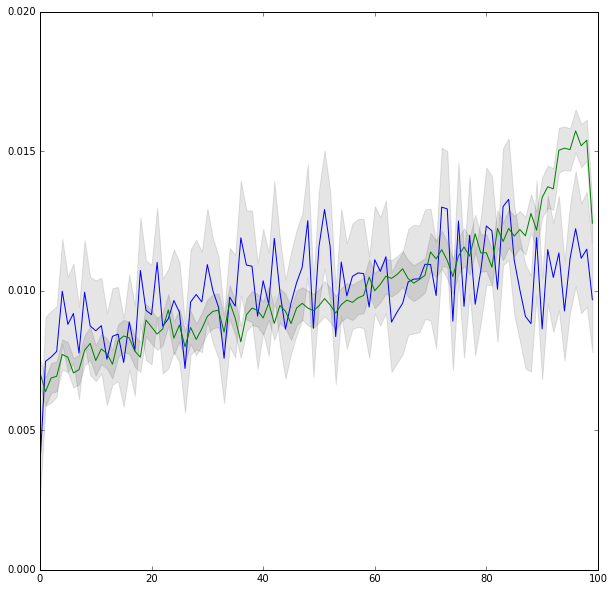

de


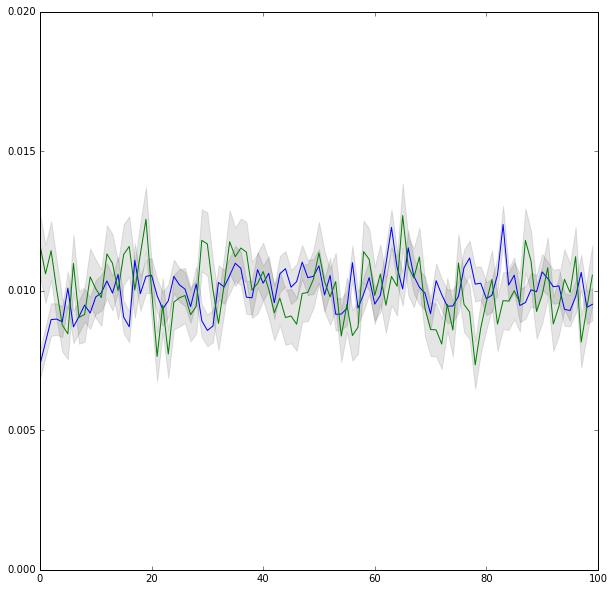

happy


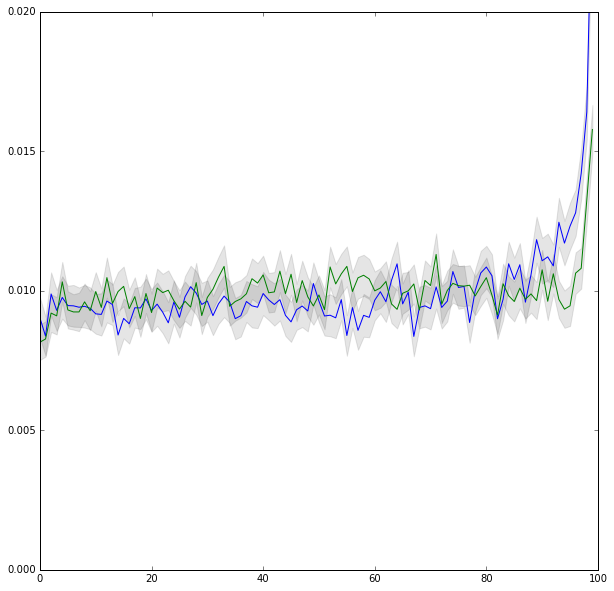

father


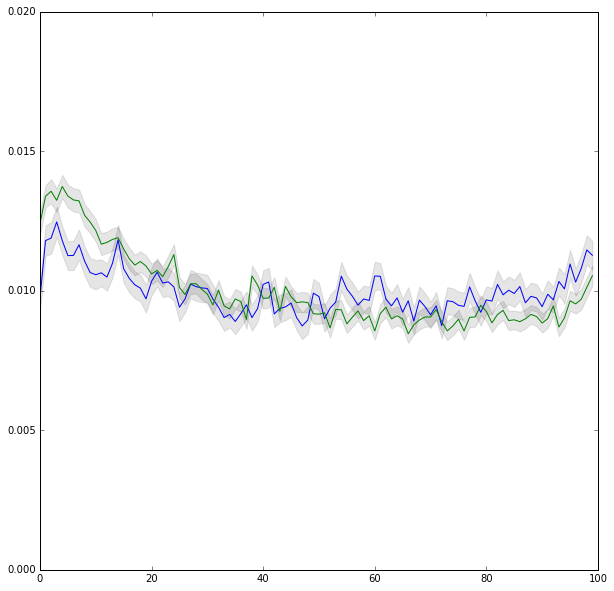

shot


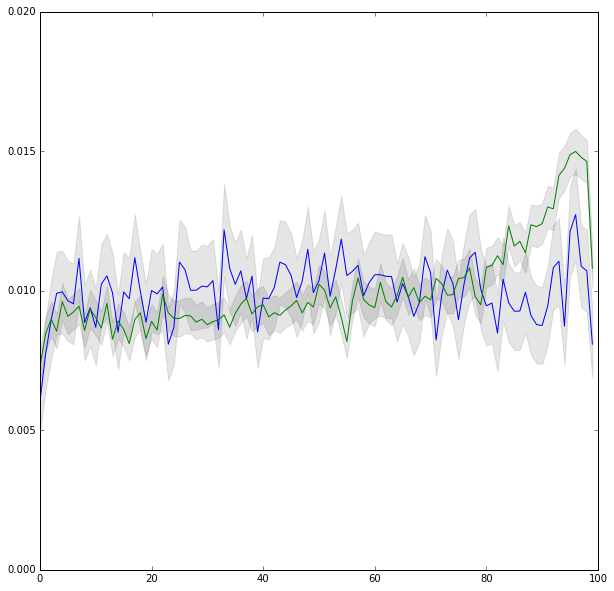

we


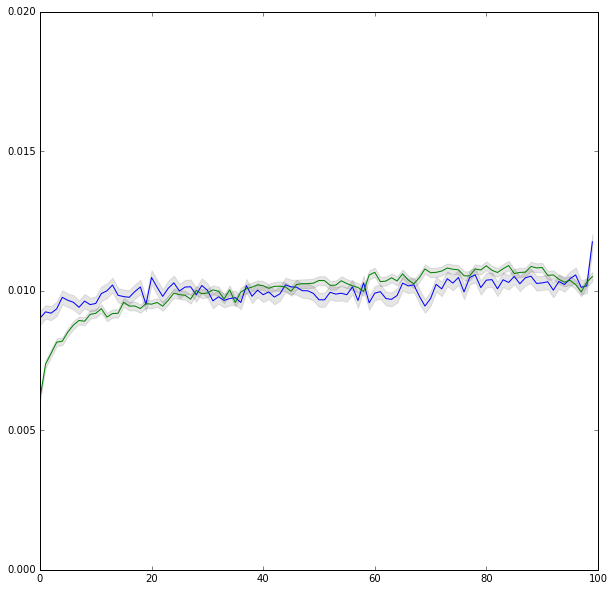

going


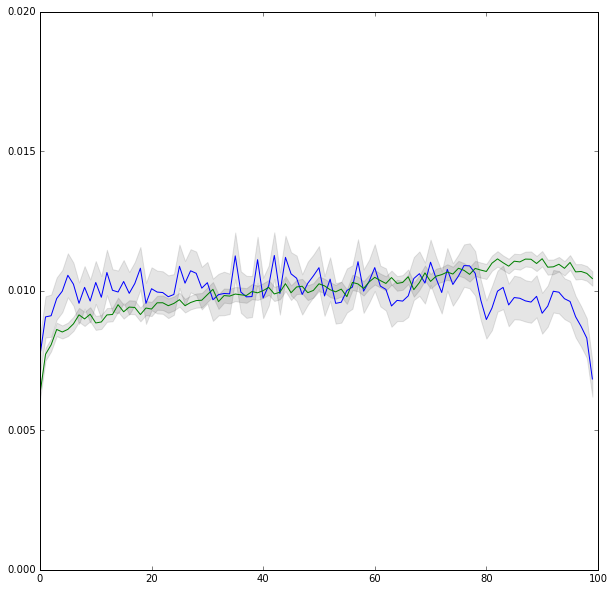

wouldnt


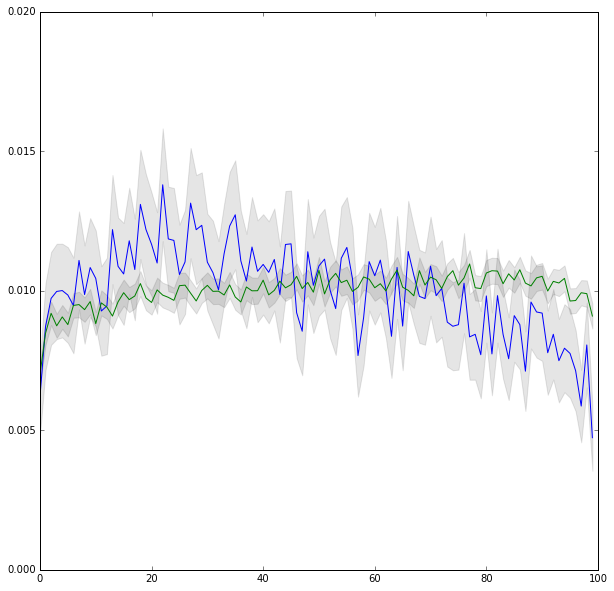

will


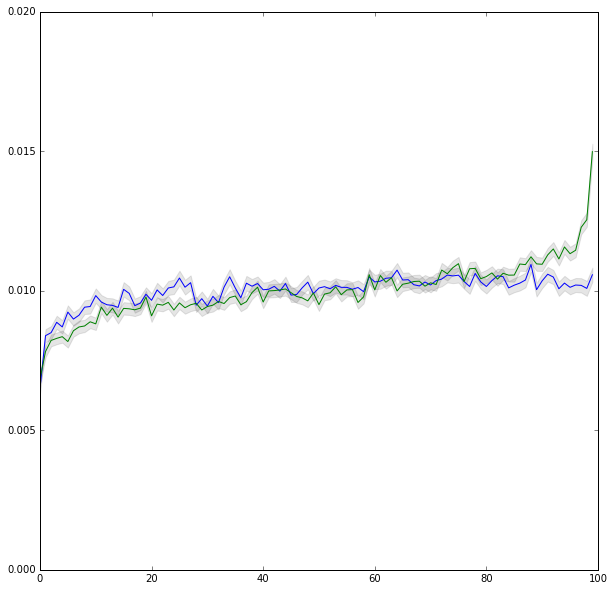

said


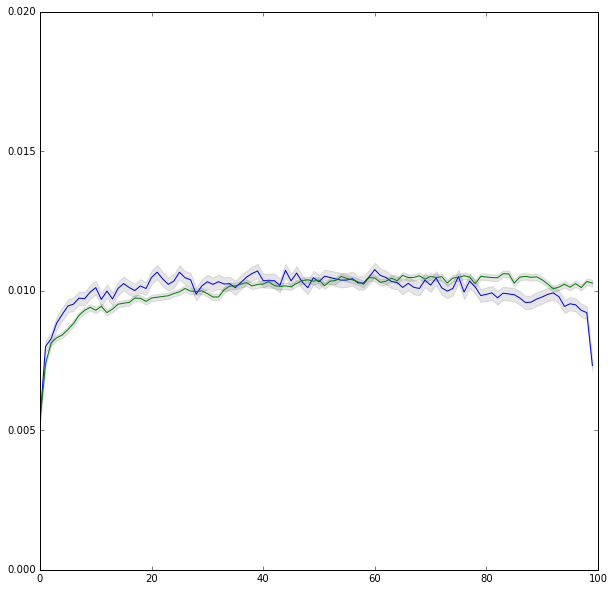

its


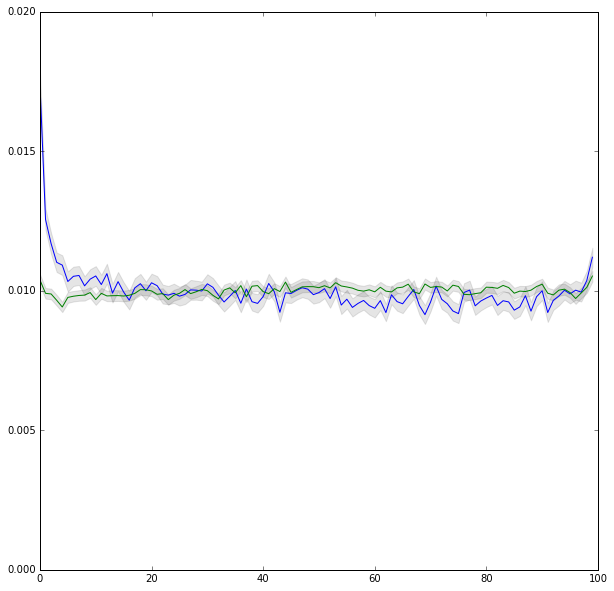

weeks


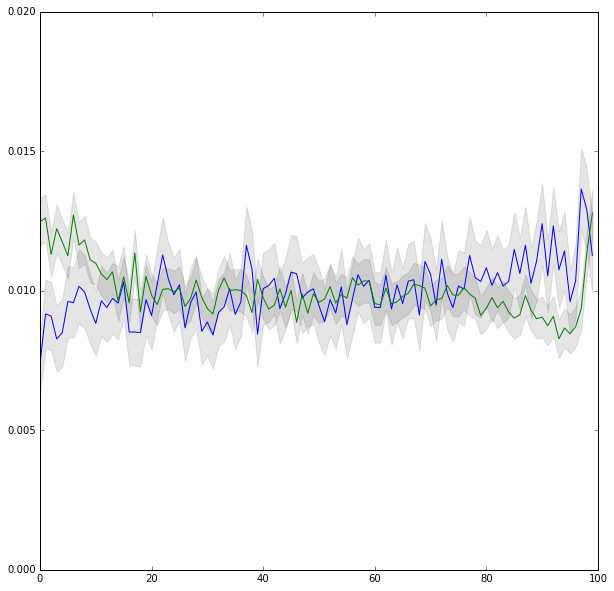

stairs


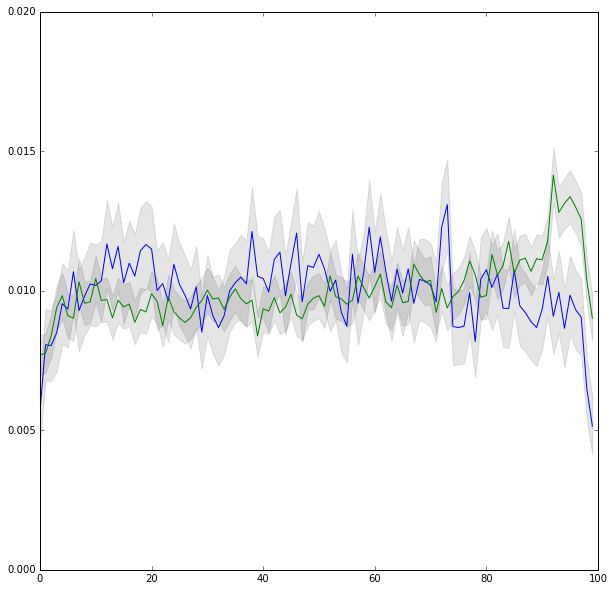

york


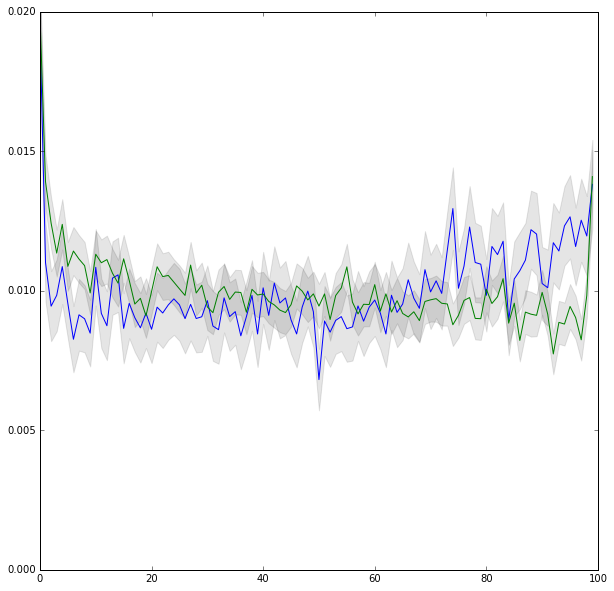

letters


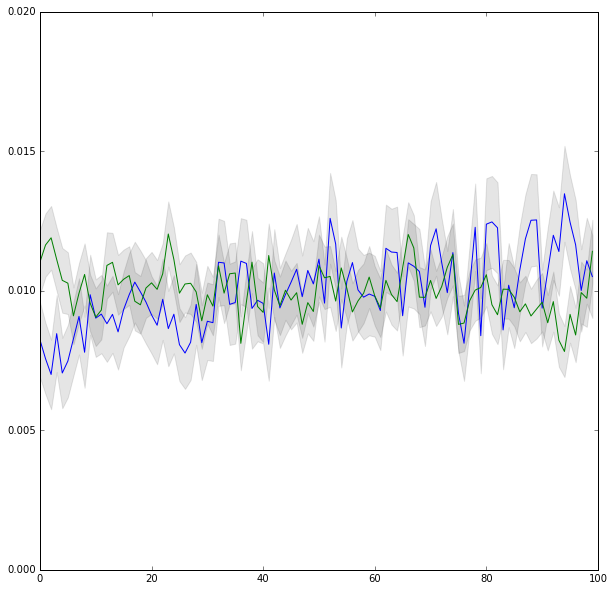

paper


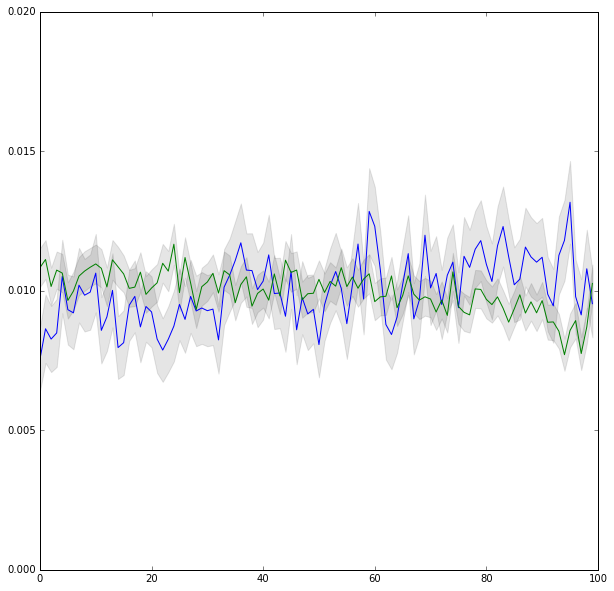

day


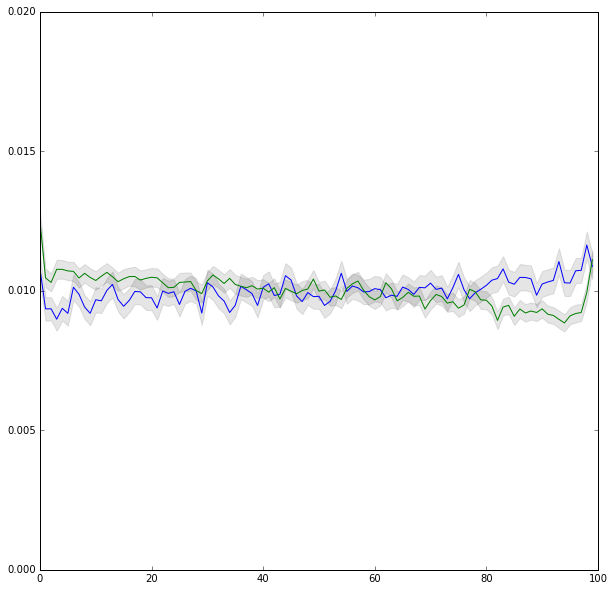

hill


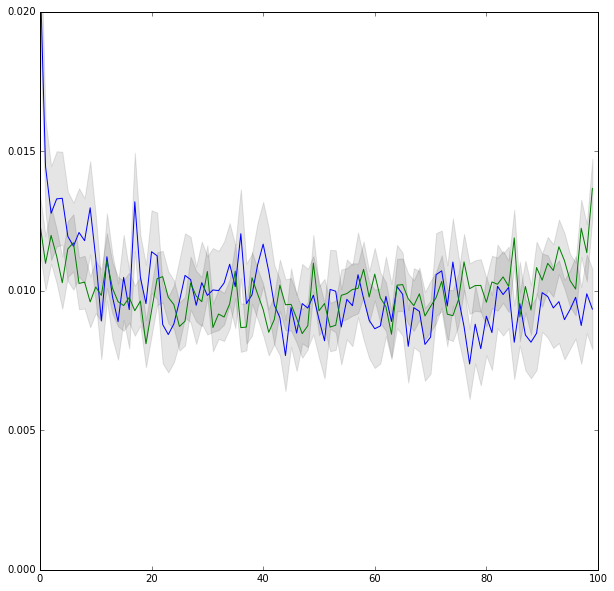

uncle


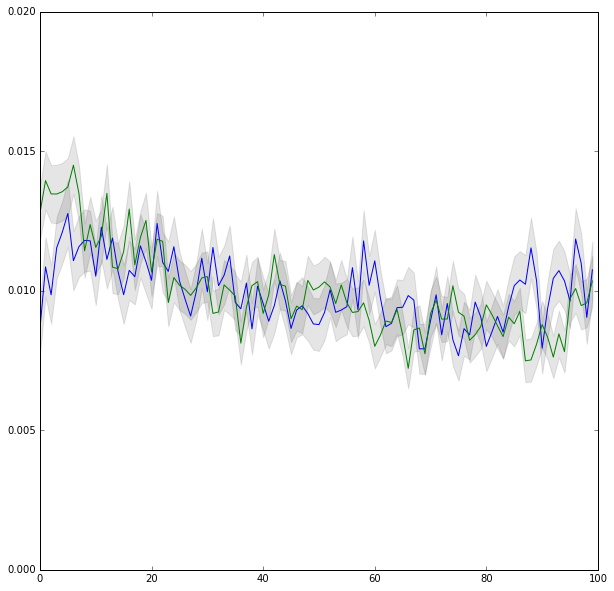

name


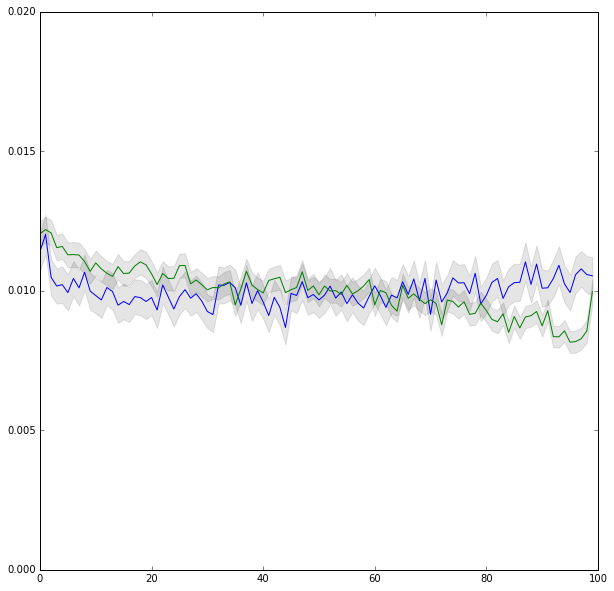

pain


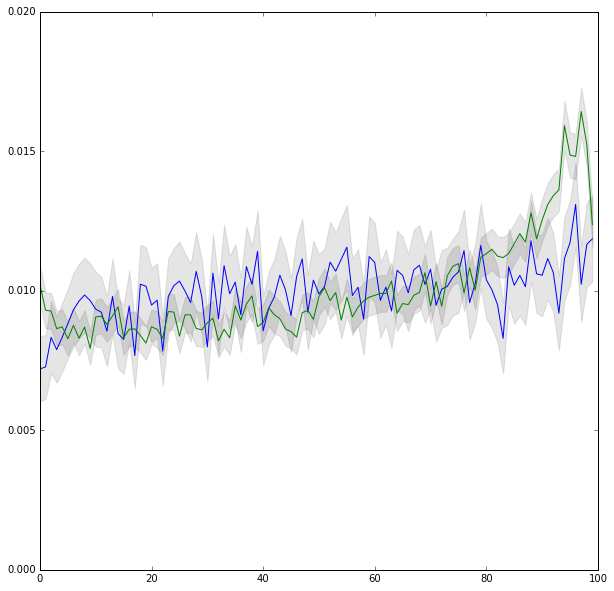

marry


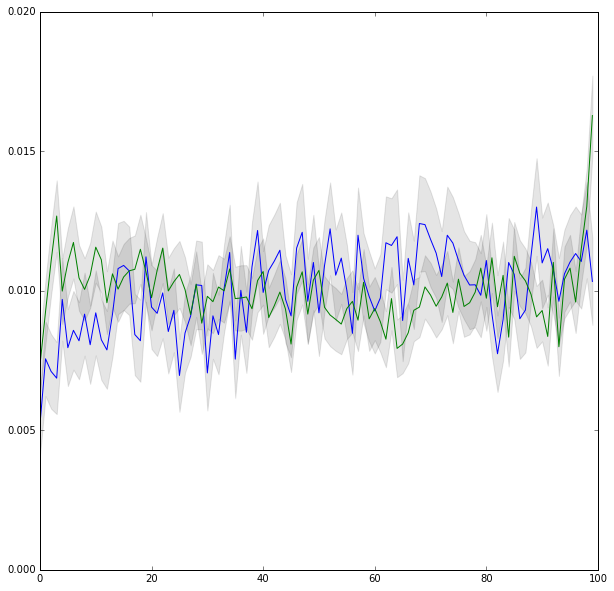

ago


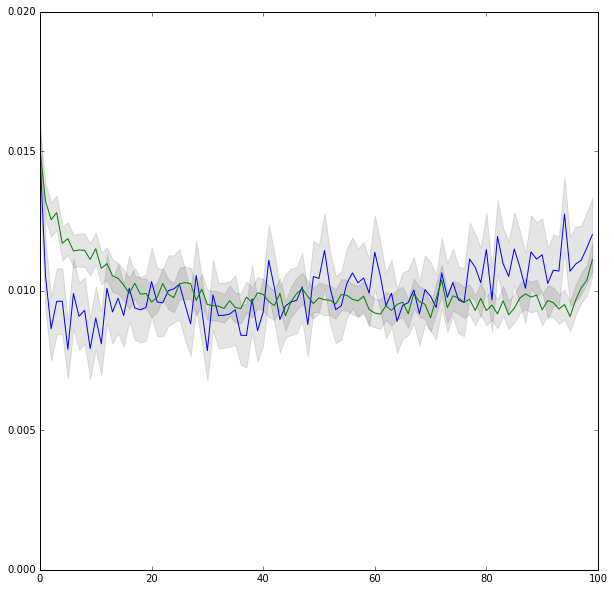

about


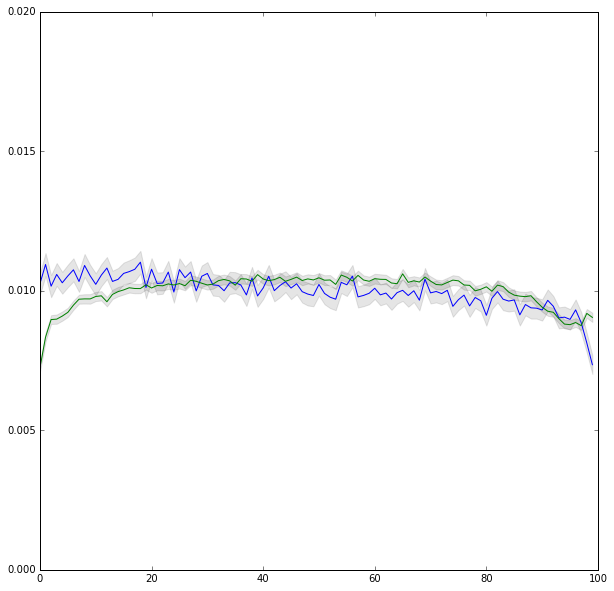

couldnt


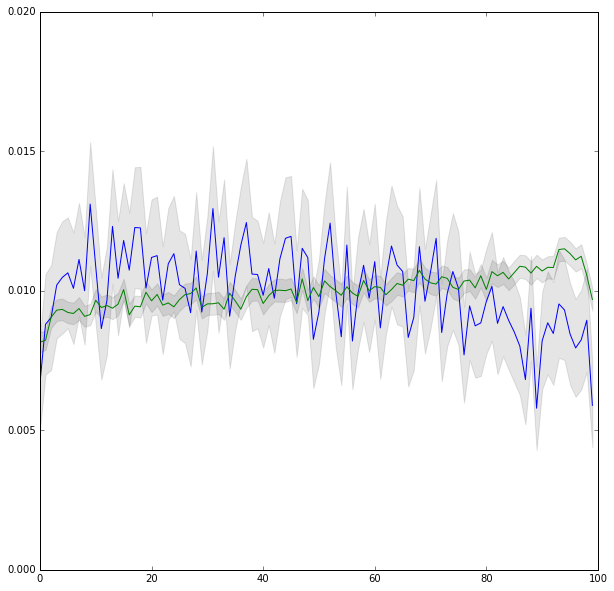

which


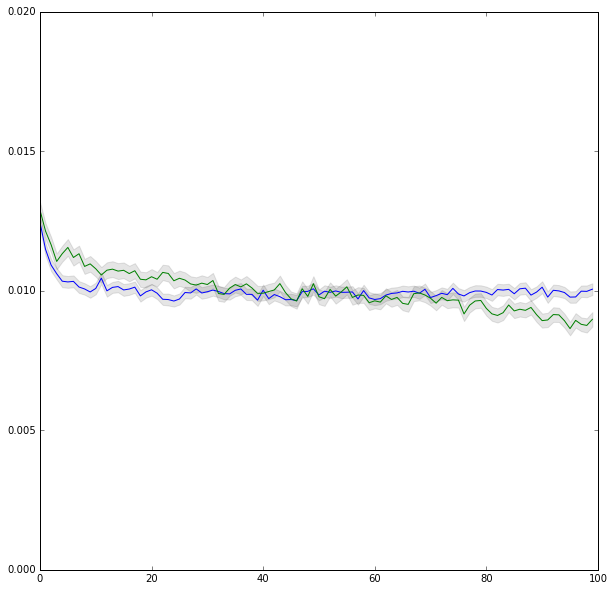

hes


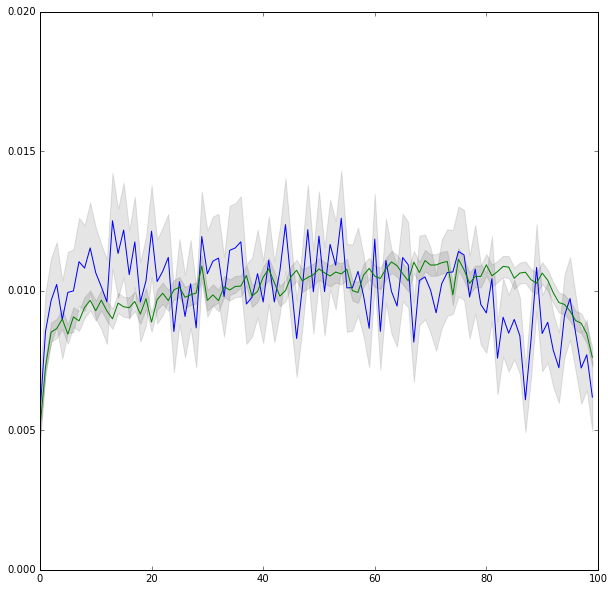

saw


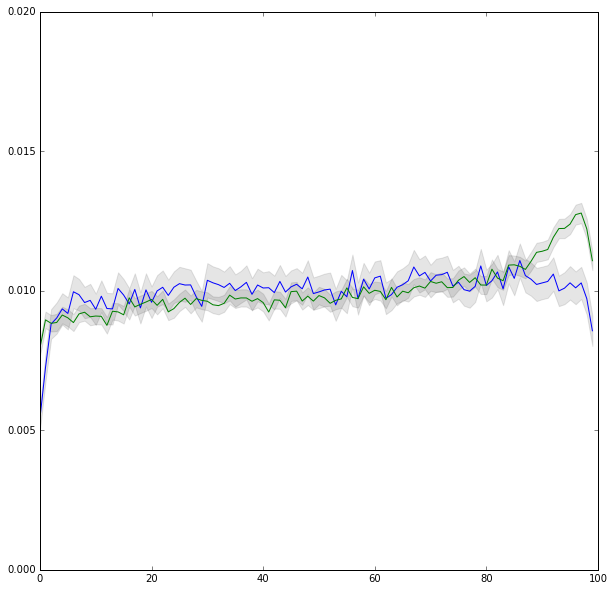

water


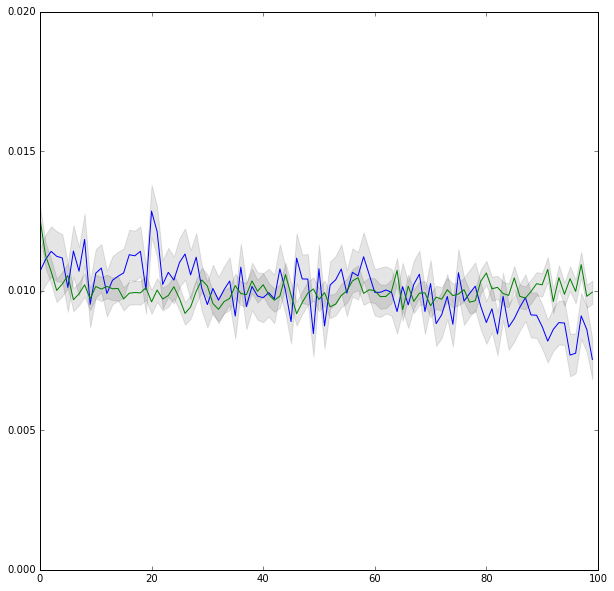

captain


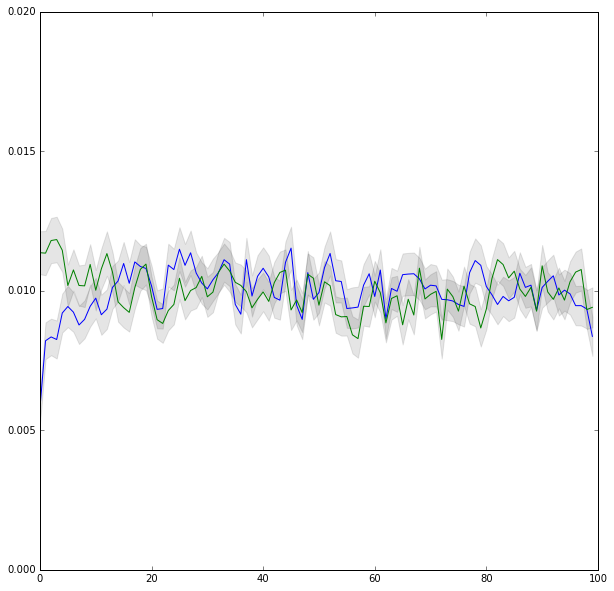

wind


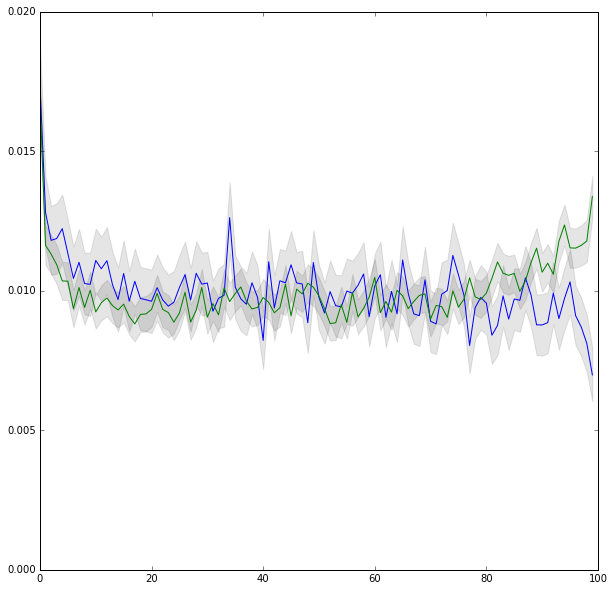

pale


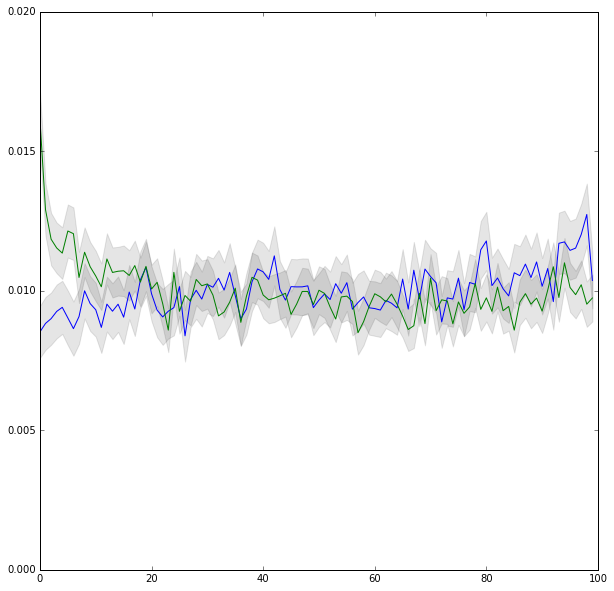

youre


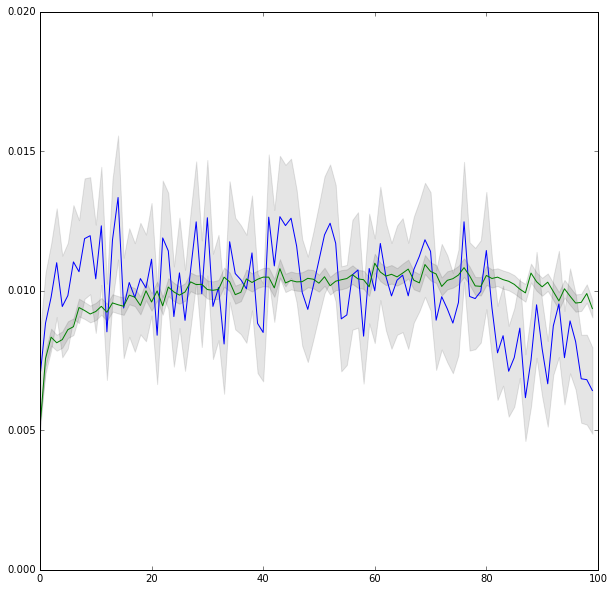

during


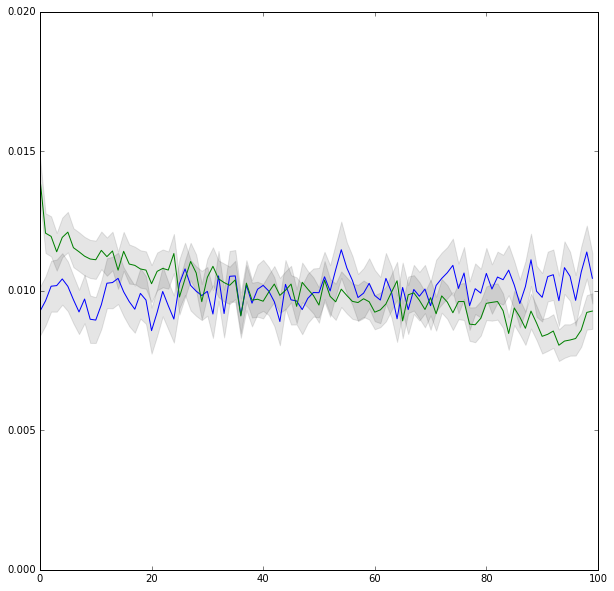

doctor


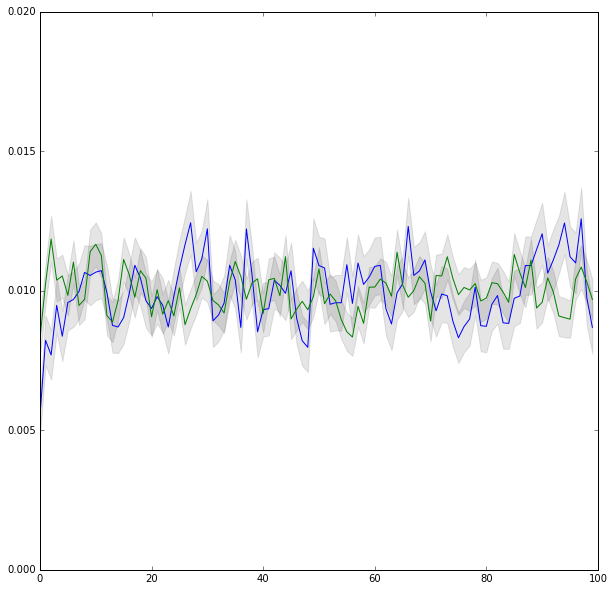

thats


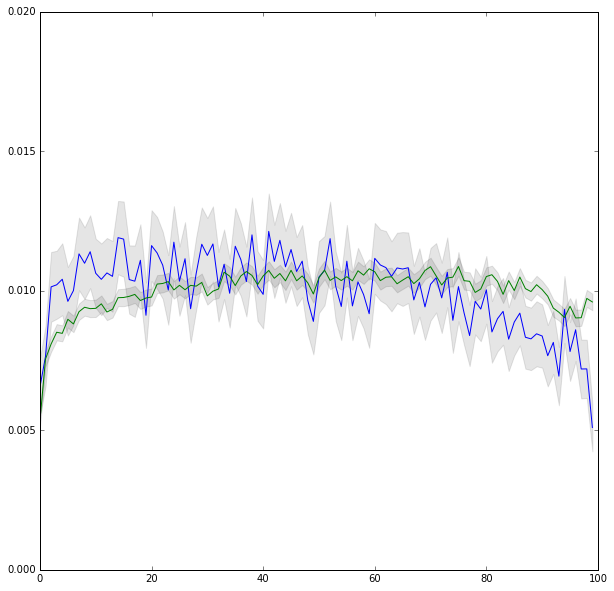

stop


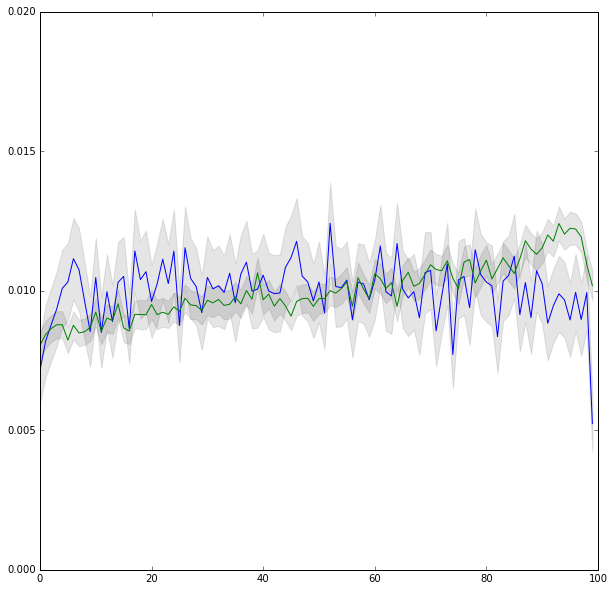

fine


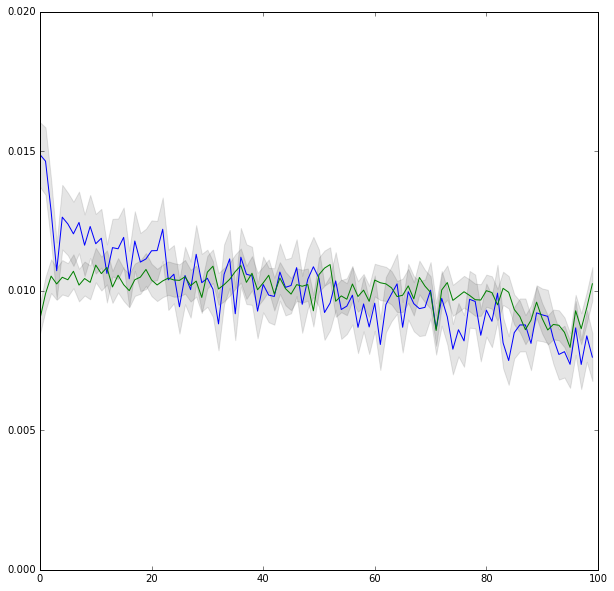

write


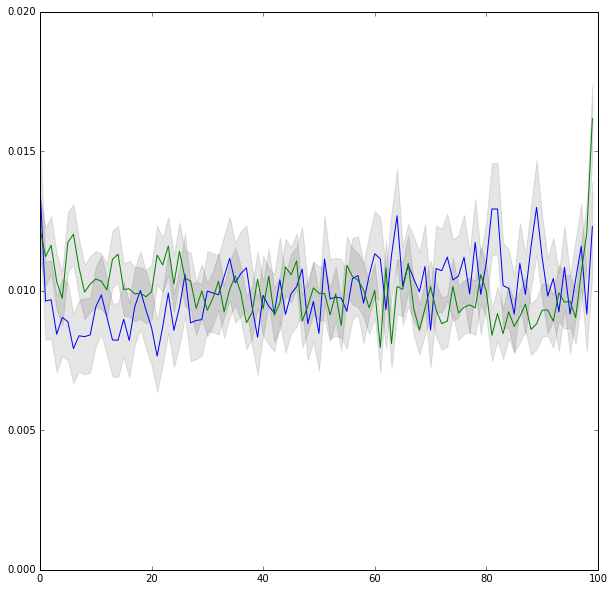

figure


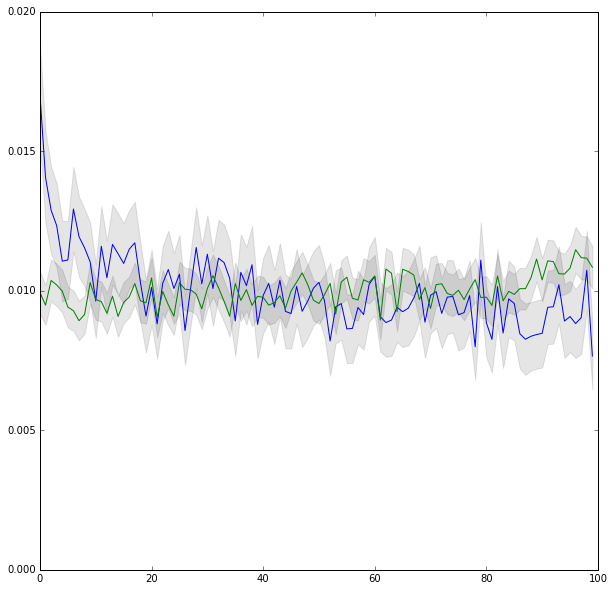

front


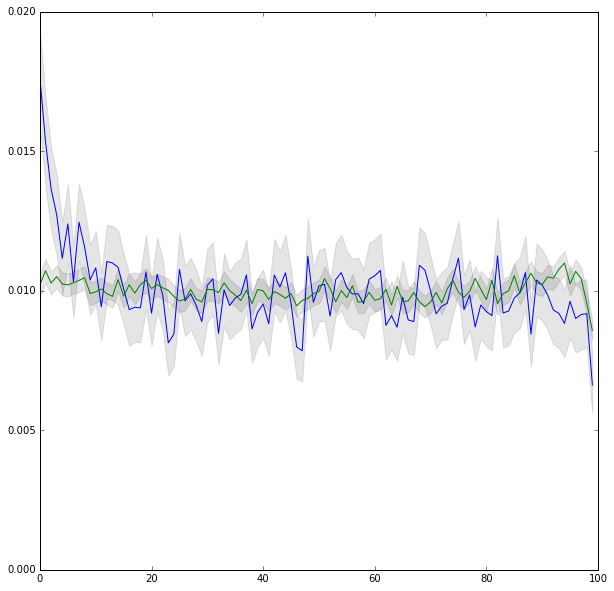

law


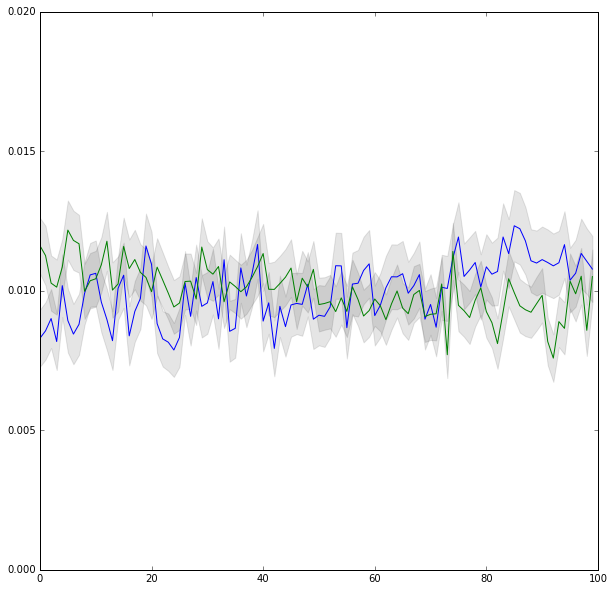

down


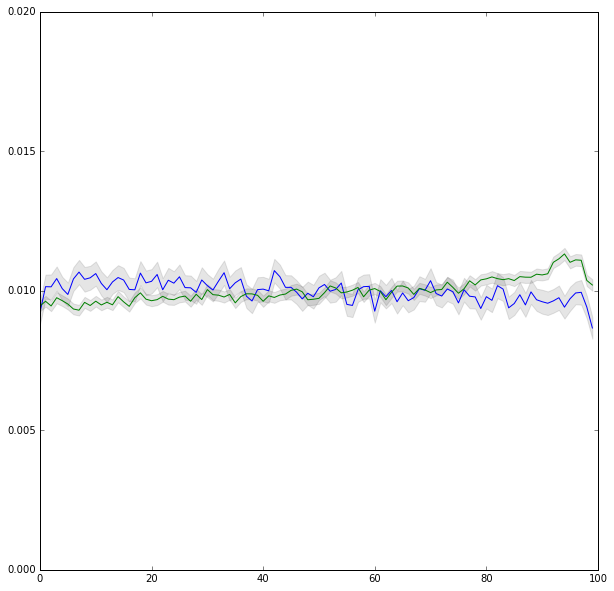

n't


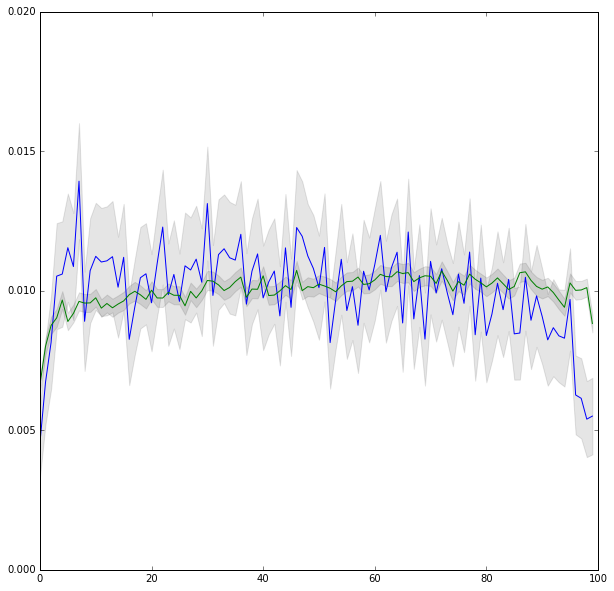

dog


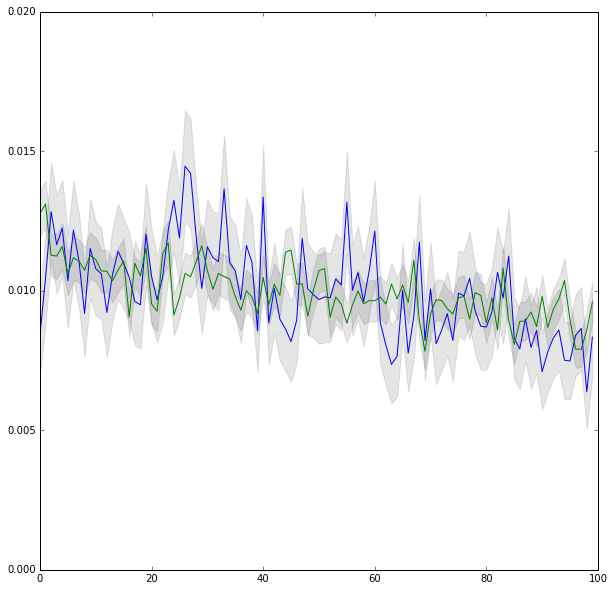

joy


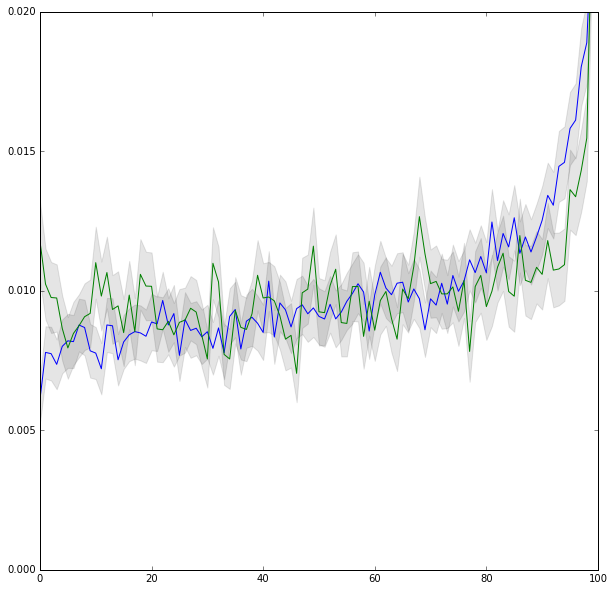

trees


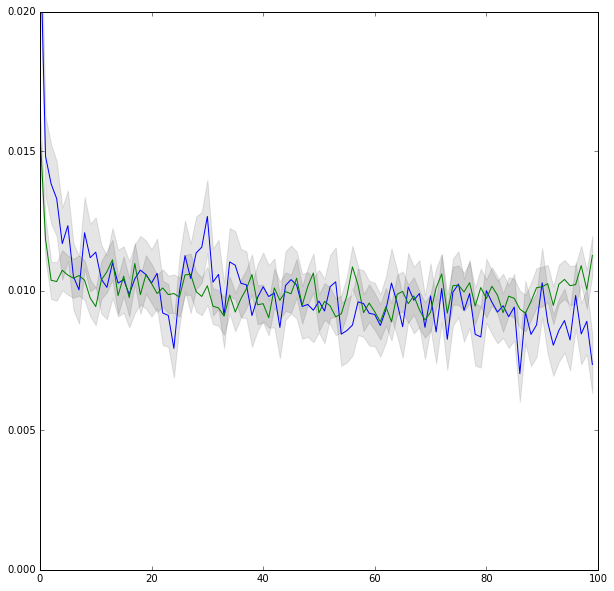

feet


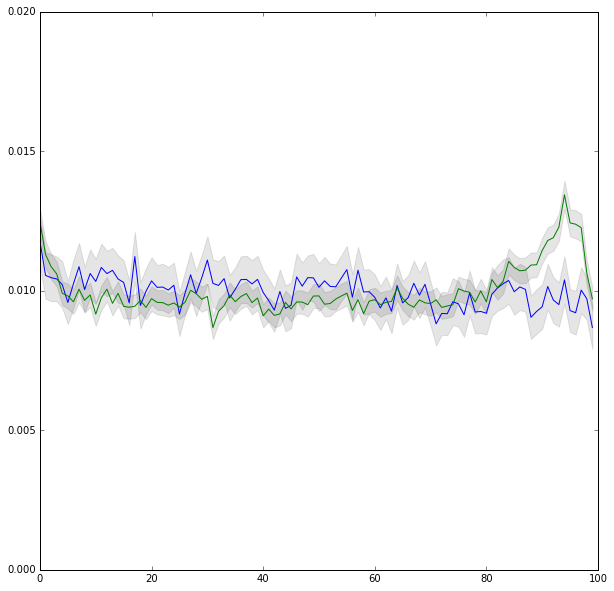

im


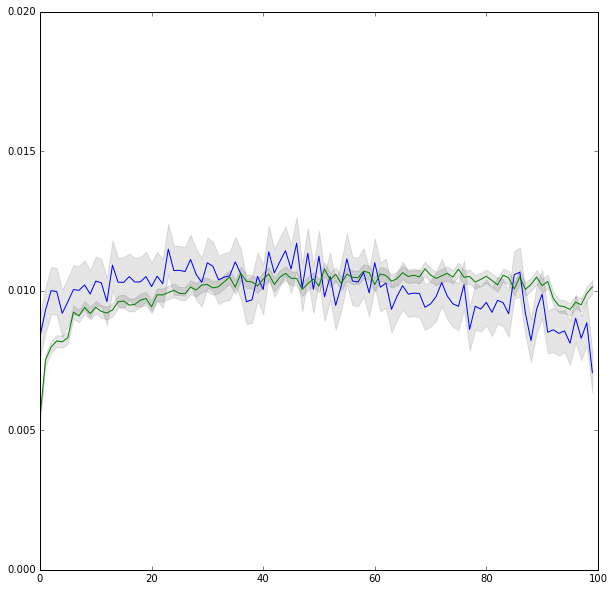

j


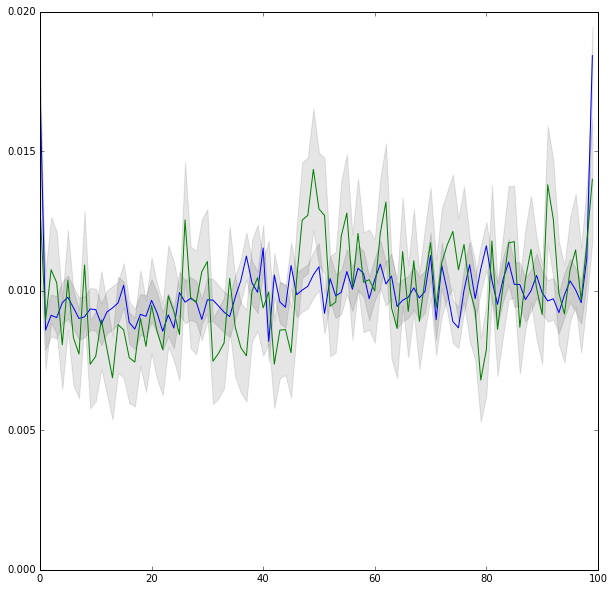

boat


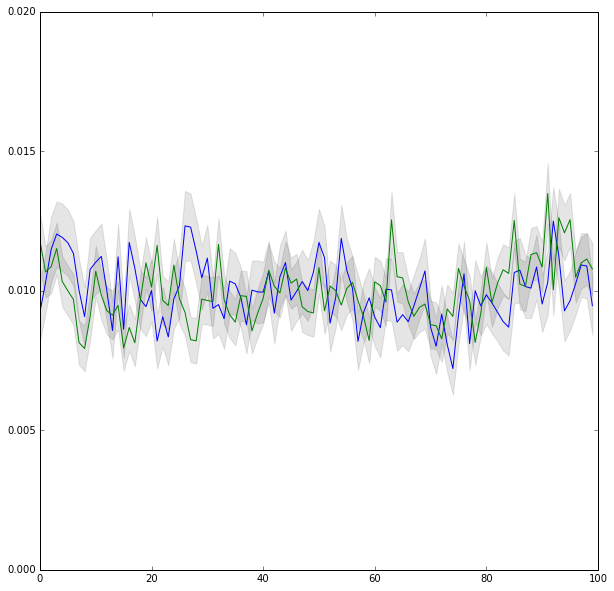

whom


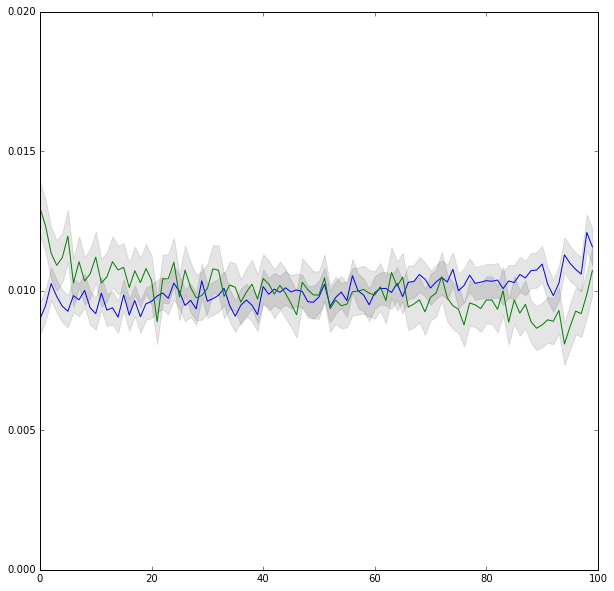

sir


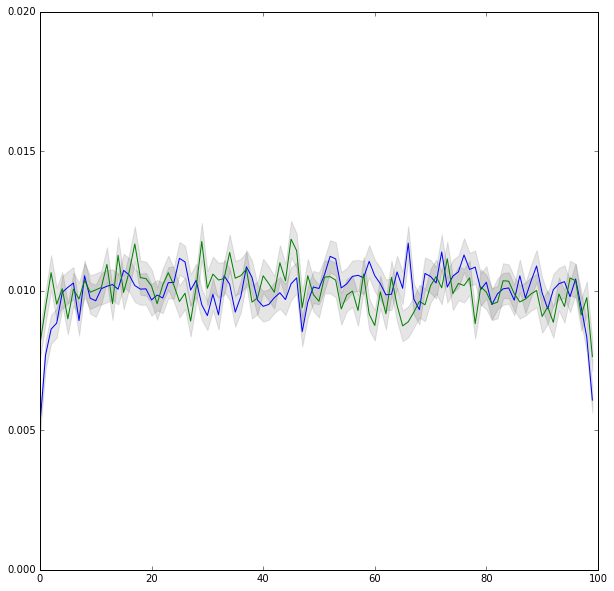

woman


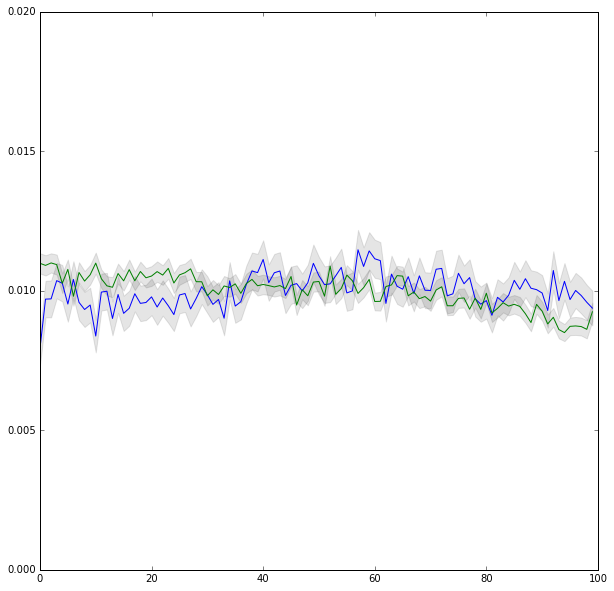

blood


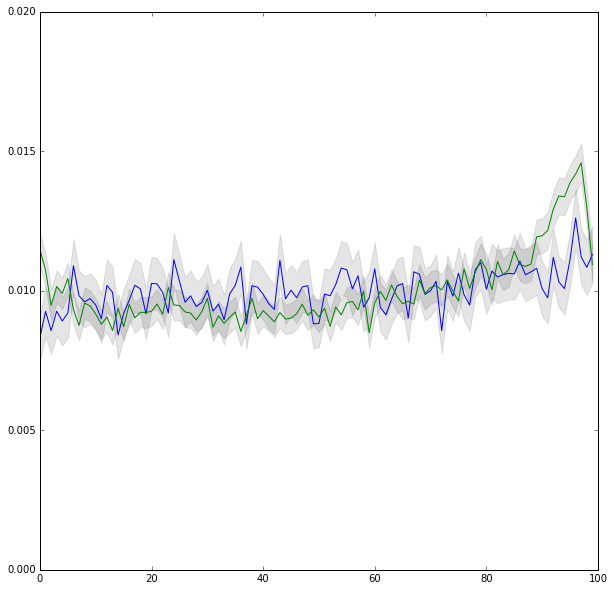

city


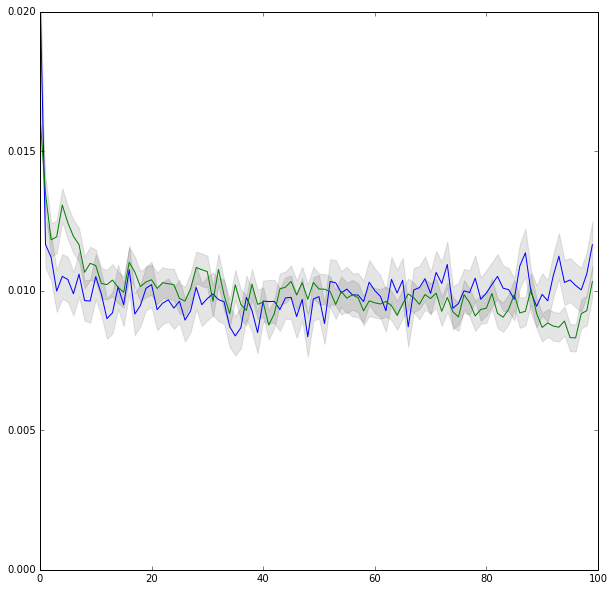

american


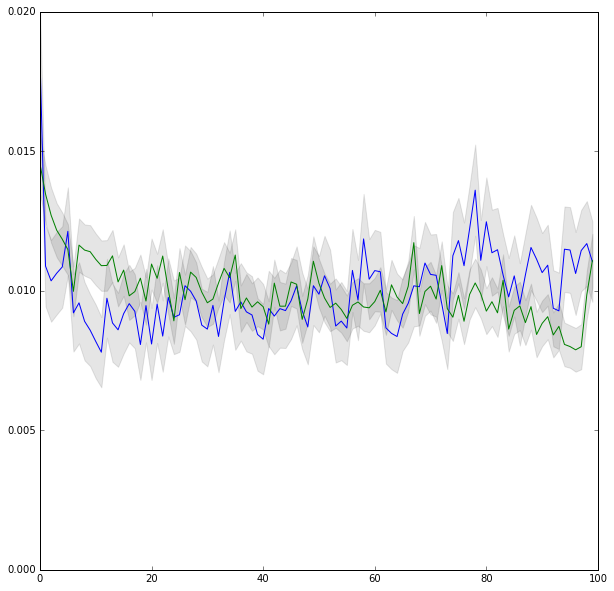

hotel


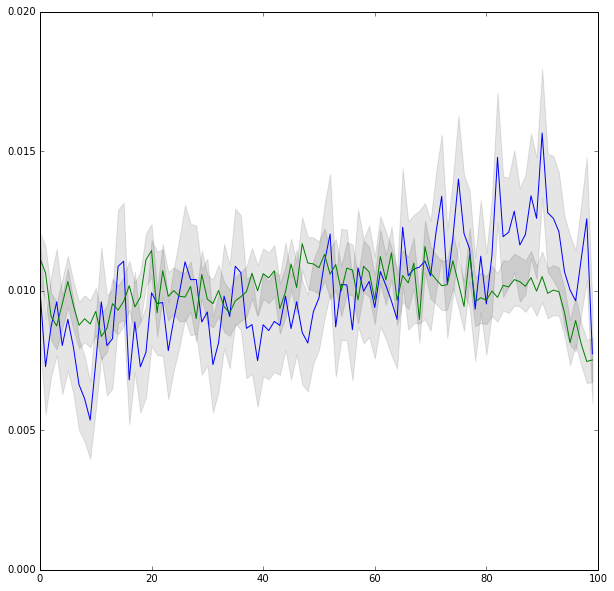

mouth


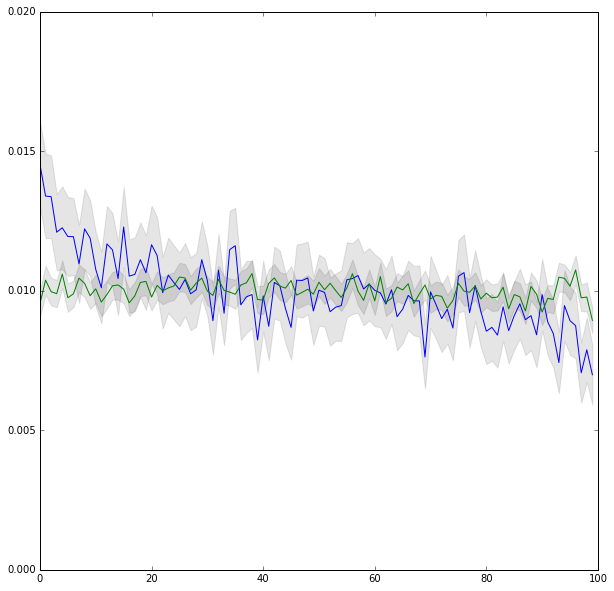

news


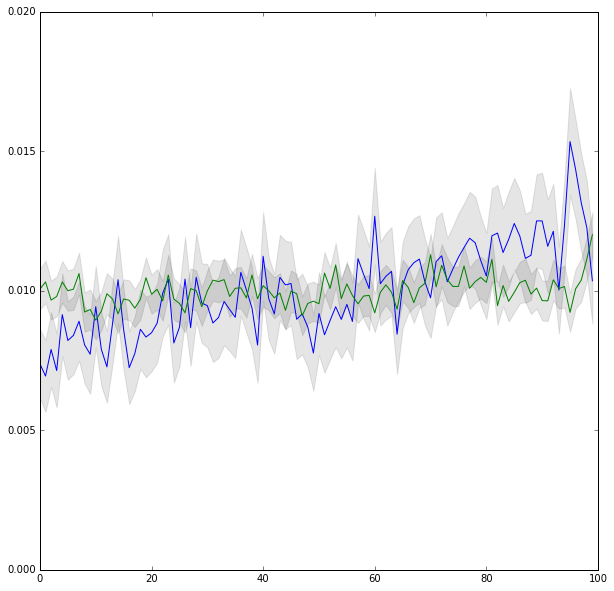

In [64]:
for token in df['token'][:100]:
    plot_movement(token)